#PRE-PROCESSING OF DATA

##Data loading and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from bs4 import BeautifulSoup

In [4]:
file_paths = [os.path.join(_folder_path, file) for file in files]
player_details = pd.read_csv(file_paths[0], low_memory=False)
mkt_val = pd.read_csv(file_paths[1], low_memory=False)
trans_hist = pd.read_csv(file_paths[2], low_memory=False)
concat_news = pd.read_csv(file_paths[5], low_memory=False)

##Player Details

In [5]:
player_details.head()

,Name,player_id,DOB,Age,Foot,Height (m),Nationality,Citizenship,Position,Other positions,Team,Joined,Contract expires
0,Thibaut Courtois,108390,1992-05-11,31.0,left,2.00,Belgium,['Belgium'],Goalkeeper,NaN,Real Madrid,2018-08-09,2026-06-30
1,Andriy Lunin,404839,1999-02-11,25.0,right,1.91,Ukraine,['Ukraine'],Goalkeeper,NaN,Real Madrid,2018-07-01,2025-06-30
2,Kepa Arrizabalaga,192279,1994-10-03,29.0,right,1.88,Spain,['Spain'],Goalkeeper,NaN,Real Madrid,2023-08-14,2024-06-30
3,Éder Militão,401530,1998-01-18,26.0,right,1.86,Brazil,"['Brazil', 'Spain']",Centre-Back,Right-Back,Real Madrid,2019-07-01,2028-06-30
4,David Alaba,59016,1992-06-24,31.0,left,1.80,Austria,['Austria'],Centre-Back,Left-Back,Real Madrid,2021-07-01,2026-06-30


In [6]:
# Standardize Citizenship - convert lists to strings
player_details['Citizenship'] = player_details['Citizenship'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [7]:
player_details.isnull().sum()

,0
Name,0
player_id,0
DOB,3
Age,3
Foot,1885
Height (m),853
Nationality,0
Citizenship,0
Position,0
Other positions,6561


In [8]:
# Handle potential duplicates based on 'player_id'
player_details.drop_duplicates(subset='player_id', keep='first', inplace=True)

In [9]:
player_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20318 entries, 0 to 20414
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              20318 non-null  object 
 1   player_id         20318 non-null  int64  
 2   DOB               20315 non-null  object 
 3   Age               20315 non-null  float64
 4   Foot              18445 non-null  object 
 5   Height (m)        19470 non-null  float64
 6   Nationality       20318 non-null  object 
 7   Citizenship       20318 non-null  object 
 8   Position          20318 non-null  object 
 9   Other positions   13789 non-null  object 
 10  Team              20318 non-null  object 
 11  Joined            20184 non-null  object 
 12  Contract expires  17636 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ MB


In [10]:
player_details.describe()

,player_id,Age,Height (m)
count,2.031800e+04,20315.000000,19470.000000
mean,4.964757e+05,25.770810,1.820135
std,2.924818e+05,4.814839,0.069512
min,2.150000e+02,15.000000,1.560000
25%,2.599125e+05,22.000000,1.770000
50%,4.597440e+05,25.000000,1.820000
75%,6.948928e+05,29.000000,1.870000
max,1.260503e+06,64.000000,2.060000


In [11]:
pdt = player_details[['Name', 'player_id', 'Age', 'Nationality', 'Position', 'Team', 'Contract expires']]

In [12]:
pdt.shape

(20318, 7)

In [13]:
pdt.isnull().sum()

,0
Name,0
player_id,0
Age,3
Nationality,0
Position,0
Team,0
Contract expires,2682


In [14]:
pdt.dropna(inplace=True)

<ipython-input-14-ae55156dee88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdt.dropna(inplace=True)


In [15]:
pdt.shape

(17635, 7)

In [16]:
pdt = pdt.copy()

In [17]:
pdt.dropna(inplace=True)

In [18]:
pdt.head()

,Name,player_id,Age,Nationality,Position,Team,Contract expires
0,Thibaut Courtois,108390,31.0,Belgium,Goalkeeper,Real Madrid,2026-06-30
1,Andriy Lunin,404839,25.0,Ukraine,Goalkeeper,Real Madrid,2025-06-30
2,Kepa Arrizabalaga,192279,29.0,Spain,Goalkeeper,Real Madrid,2024-06-30
3,Éder Militão,401530,26.0,Brazil,Centre-Back,Real Madrid,2028-06-30
4,David Alaba,59016,31.0,Austria,Centre-Back,Real Madrid,2026-06-30


### EDA

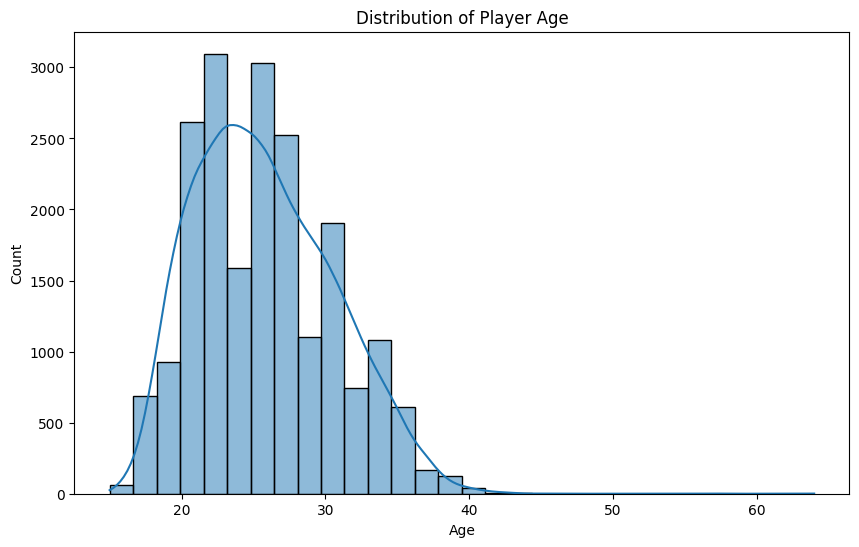

In [ ]:
# Distribution of players' age
plt.figure(figsize=(10, 6))
sns.histplot(player_details['Age'], bins=30, kde=True)
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

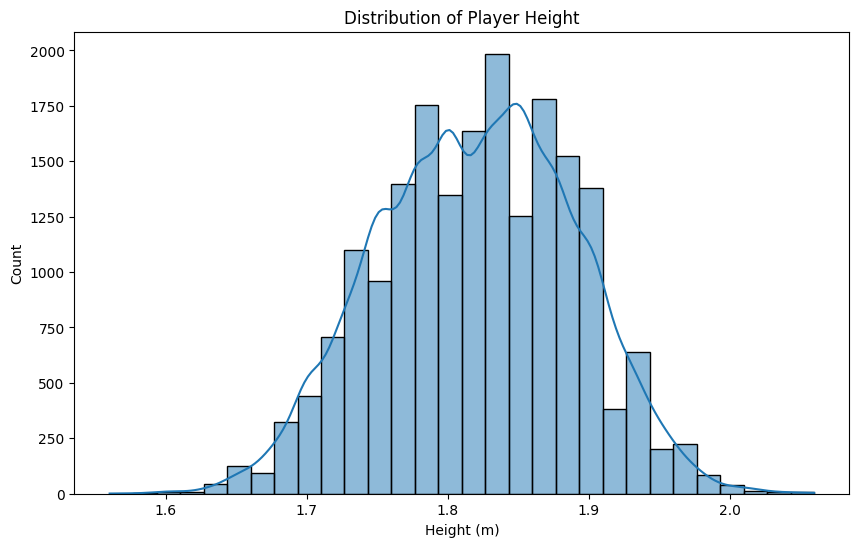

In [ ]:
# Distribution of players' height
plt.figure(figsize=(10, 6))
sns.histplot(player_details['Height (m)'], bins=30, kde=True)
plt.title('Distribution of Player Height')
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.show()

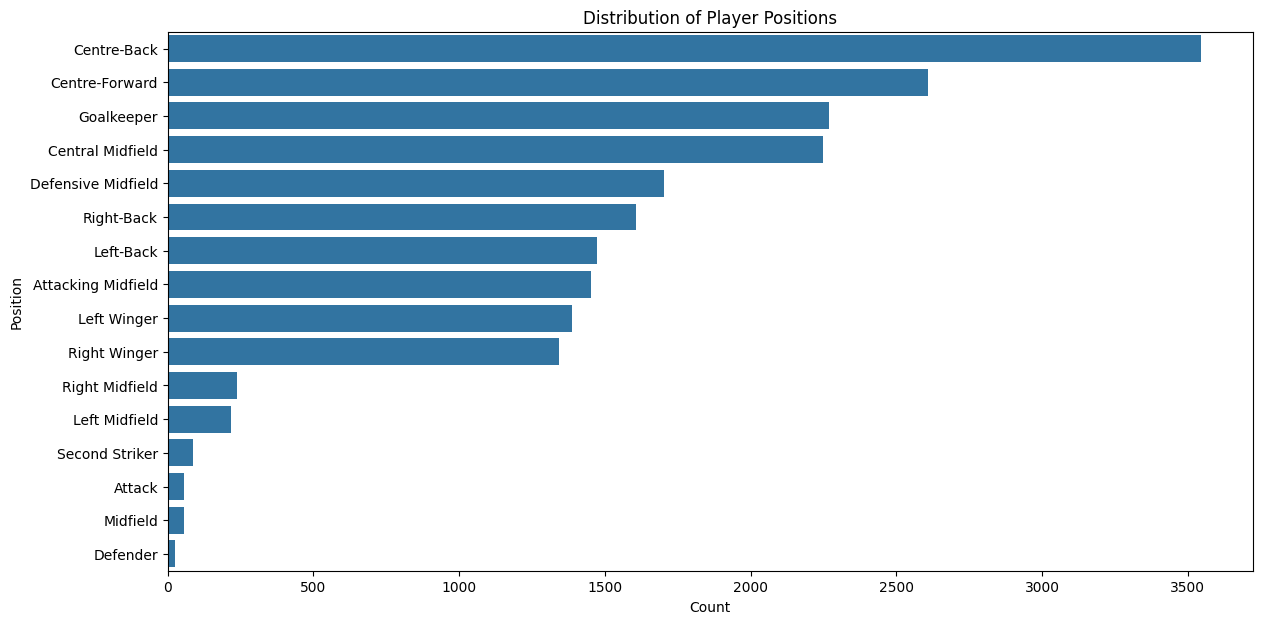

In [ ]:
# Distribution of players' positions
plt.figure(figsize=(14, 7))
sns.countplot(y=player_details['Position'], order=player_details['Position'].value_counts().index)
plt.title('Distribution of Player Positions')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

##Market value

In [18]:
mkt_val.head()

,mw,datum_mw,verein,age,player_id,Highest market value,highest_date,last_change
0,50000.0,2009-05-27,KRC Genk U19,17,108390,75000000.0,2020-10-08,2024-03-21
1,150000.0,2010-07-28,KRC Genk,18,108390,75000000.0,2020-10-08,2024-03-21
2,1000000.0,2010-10-06,KRC Genk,18,108390,75000000.0,2020-10-08,2024-03-21
3,2000000.0,2010-12-28,KRC Genk,18,108390,75000000.0,2020-10-08,2024-03-21
4,3000000.0,2011-05-24,KRC Genk,19,108390,75000000.0,2020-10-08,2024-03-21


In [19]:
mkt_val.shape

(280334, 8)

In [20]:
mkt_val.isnull().sum()

,0
mw,0
datum_mw,0
verein,0
age,0
player_id,0
Highest market value,0
highest_date,0
last_change,0


In [21]:
# Function to determine the season
def get_season(date):
    date = pd.to_datetime(date) # Convert the date string to a datetime object
    year = date.year
    month = date.month
    if month >= 8:  # From August to December
        return f"{str(year)[-2:]}/{str(year + 1)[-2:]}"
    else:  # From January to July
        return f"{str(year - 1)[-2:]}/{str(year)[-2:]}"

# Apply the function to the 'date' column
mkt_val['derived_season'] = mkt_val['datum_mw'].apply(get_season)

In [22]:
mkt_val.head()

,mw,datum_mw,verein,age,player_id,Highest market value,highest_date,last_change,derived_season
0,50000.0,2009-05-27,KRC Genk U19,17,108390,75000000.0,2020-10-08,2024-03-21,08/09
1,150000.0,2010-07-28,KRC Genk,18,108390,75000000.0,2020-10-08,2024-03-21,09/10
2,1000000.0,2010-10-06,KRC Genk,18,108390,75000000.0,2020-10-08,2024-03-21,10/11
3,2000000.0,2010-12-28,KRC Genk,18,108390,75000000.0,2020-10-08,2024-03-21,10/11
4,3000000.0,2011-05-24,KRC Genk,19,108390,75000000.0,2020-10-08,2024-03-21,10/11


In [23]:
mktv = mkt_val[['player_id', 'age', 'mw', 'datum_mw', 'verein']]

In [24]:
# Convert date columns to datetime format
mkt_val['datum_mw'] = pd.to_datetime(mkt_val['datum_mw'])

In [25]:

mktv = mktv.copy()

mktv.rename(columns={'age': 'Age'}, inplace=True)

In [26]:
# Convert 'date' column to datetime object
mkt_val['datum_mw'] = pd.to_datetime(mkt_val['datum_mw'], errors='coerce')

In [29]:
# Remove outliers in 'mw' (market value) column by filtering any value below a threshold
mktv = mktv[mktv['mw'] > 1000]

In [30]:
mktv.head()

,player_id,Age,mw,datum_mw,verein
0,108390,17,50000.0,2009-05-27,KRC Genk U19
1,108390,18,150000.0,2010-07-28,KRC Genk
2,108390,18,1000000.0,2010-10-06,KRC Genk
3,108390,18,2000000.0,2010-12-28,KRC Genk
4,108390,19,3000000.0,2011-05-24,KRC Genk


### EDA

In [ ]:
mkt_val.describe()

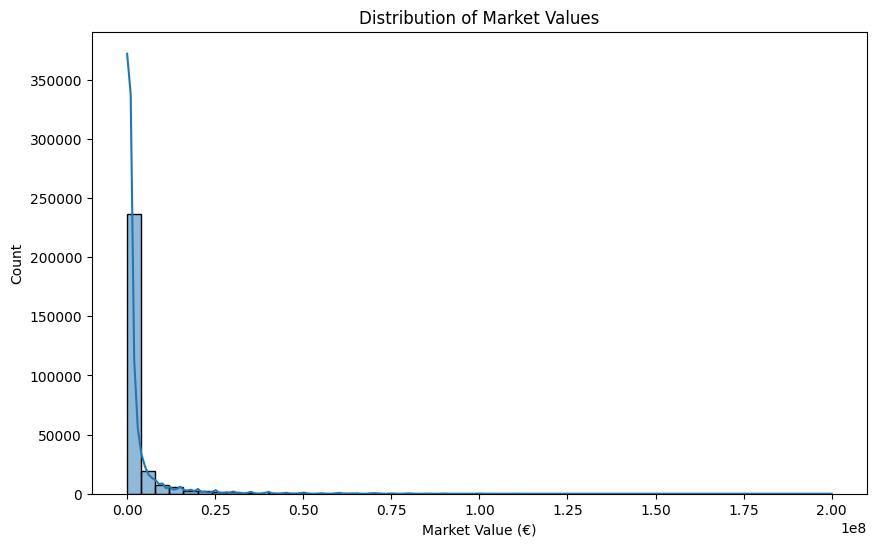

In [ ]:
# Distribution of market values
plt.figure(figsize=(10, 6))
sns.histplot(mkt_val['mw'], bins=50, kde=True)
plt.title('Distribution of Market Values')
plt.xlabel('Market Value (€)')
plt.ylabel('Count')
plt.show()

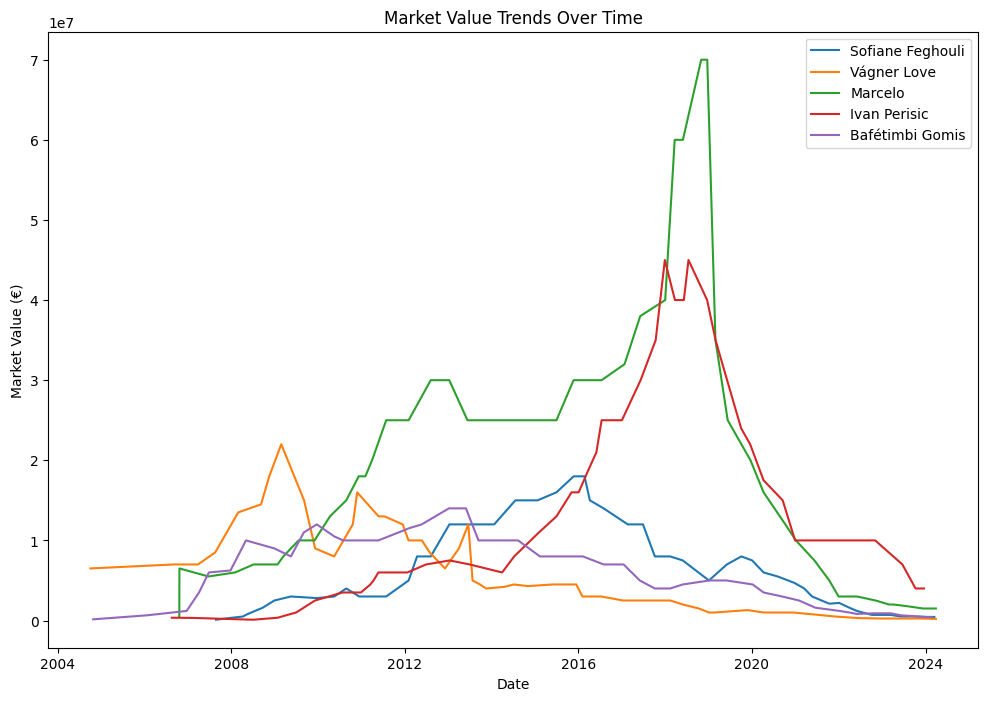

In [ ]:
# Market value trends over time for some players
players_to_plot = mktv['player_id'].value_counts().nlargest(5).index

plt.figure(figsize=(12, 8))
for player_id in players_to_plot:
    player_data = mktv[mktv['player_id'] == player_id]
    plt.plot(player_data['datum_mw'], player_data['mw'], label=pdt[pdt['player_id'] == player_id]['Name'].values[0])
plt.title('Market Value Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Market Value (€)')
plt.legend()
plt.show()


In [ ]:
# Highest market values per player
highest_mkt_vals = mkt_val.groupby('player_id')['Highest market value'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=highest_mkt_vals.values, y=player_details[player_details['player_id'].isin(highest_mkt_vals.index)]['Name'])
plt.title('Top 10 Highest Market Values of Players')
plt.xlabel('Highest Market Value (€)')
plt.ylabel('Player')
plt.show()

##Tansfer history

In [31]:
trans_hist.tail()

,from_clubName,from_latitude,from_longitude,to_clubName,to_latitude,to_longitude,url,futureTransfer,date,dateUnformatted,upcoming,season,marketValue,fee,player_id,Total transfer fees,TM Market Value,Transfer Type,Transfer Fee
151431,Uni Cluj U19,46.749806,23.598462,ACSM Poli Iasi,47.186059,27.562736,/darius-deac/transfers/spieler/935889,0.0,2022-07-01,2022-07-01,False,22/23,€10k,free transfer,935889,0,10000.0,Transfer,0.0
151432,FV Eppelborn,49.403136,6.970649,ACSM Poli Iasi,47.186059,27.562736,/karim-satmarean/transfers/spieler/1039748,0.0,2023-07-01,2023-07-01,False,23/24,-,free transfer,1039748,0,0.0,Transfer,0.0
151433,E. Dortmund,51.493190,7.464780,FV Eppelborn,49.403136,6.970649,/karim-satmarean/transfers/spieler/1039748,0.0,2022-07-01,2022-07-01,False,22/23,-,free transfer,1039748,0,0.0,Transfer,0.0
151434,Rapid Brodoc,46.639394,27.730951,ACSM Poli Iasi,47.186059,27.562736,/cristian-grigoriu/transfers/spieler/1031088,0.0,2023-06-30,2023-06-30,False,22/23,-,End of loan,1031088,0,0.0,End of Loan,0.0
151435,ACSM Poli Iasi,47.186059,27.562736,Rapid Brodoc,46.639394,27.730951,/cristian-grigoriu/transfers/spieler/1031088,0.0,2022-07-01,2022-07-01,False,22/23,-,loan transfer,1031088,0,0.0,Loan,0.0


In [32]:
trans_hist.isnull().sum()

,0
from_clubName,0
from_latitude,231
from_longitude,231
to_clubName,0
to_latitude,152
to_longitude,152
url,0
futureTransfer,0
date,24
dateUnformatted,0


In [33]:
# Convert date columns to datetime format
trans_hist['date'] = pd.to_datetime(trans_hist['date'], errors='coerce')
trans_hist['dateUnformatted'] = pd.to_datetime(trans_hist['dateUnformatted'], errors='coerce')

In [34]:
trans_hist['date'] = trans_hist['date'].fillna(trans_hist['dateUnformatted'])

In [35]:
# Function to determine the season
def get_season(date):
    year = date.year
    month = date.month
    if month >= 8:  # From August to December
        return f"{str(year)[-2:]}/{str(year + 1)[-2:]}"
    else:  # From January to July
        return f"{str(year - 1)[-2:]}/{str(year)[-2:]}"

# Apply the function to the 'date' column
trans_hist['derived_season'] = trans_hist['date'].apply(get_season)

In [36]:
trans_hist.columns

Index(['from_clubName', 'from_latitude', 'from_longitude', 'to_clubName',
       'to_latitude', 'to_longitude', 'url', 'futureTransfer', 'date',
       'dateUnformatted', 'upcoming', 'season', 'marketValue', 'fee',
       'player_id', 'Total transfer fees', 'TM Market Value', 'Transfer Type',
       'Transfer Fee', 'derived_season'],
      dtype='object')

In [37]:
th = trans_hist[['player_id', 'futureTransfer', 'date', 'from_clubName', 'to_clubName', 'upcoming', 'TM Market Value']]

In [38]:
print(th.isnull().sum())


player_id           0
futureTransfer      0
date               24
from_clubName       0
to_clubName         0
upcoming            0
TM Market Value     0
dtype: int64


In [39]:
# Filter out rows where any of the specified columns have a value of 0.0
th = th[(th['TM Market Value'] != 0.0)]

In [40]:
th.head()

,player_id,futureTransfer,date,from_clubName,to_clubName,upcoming,TM Market Value
0,108390,0.0,2018-08-09,Chelsea,Real Madrid,False,65000000.0
1,108390,0.0,2014-06-30,Atlético Madrid,Chelsea,False,25000000.0
2,108390,0.0,2011-07-27,Chelsea,Atlético Madrid,False,4000000.0
3,108390,0.0,2011-07-26,KRC Genk,Chelsea,False,4000000.0
4,108390,0.0,2009-07-01,KRC Genk U19,KRC Genk,False,50000.0


In [41]:
th.shape

(95078, 7)

In [42]:

th.drop_duplicates(keep='first', inplace=True)

In [43]:
th.duplicated().sum()

0

In [44]:

th.dropna(subset=['date'], inplace=True)

In [45]:
# Reset index after dropping rows
th.reset_index(drop=True, inplace=True)

In [46]:
print(th.isnull().sum())

player_id          0
futureTransfer     0
date               0
from_clubName      0
to_clubName        0
upcoming           0
TM Market Value    0
dtype: int64


### EDA

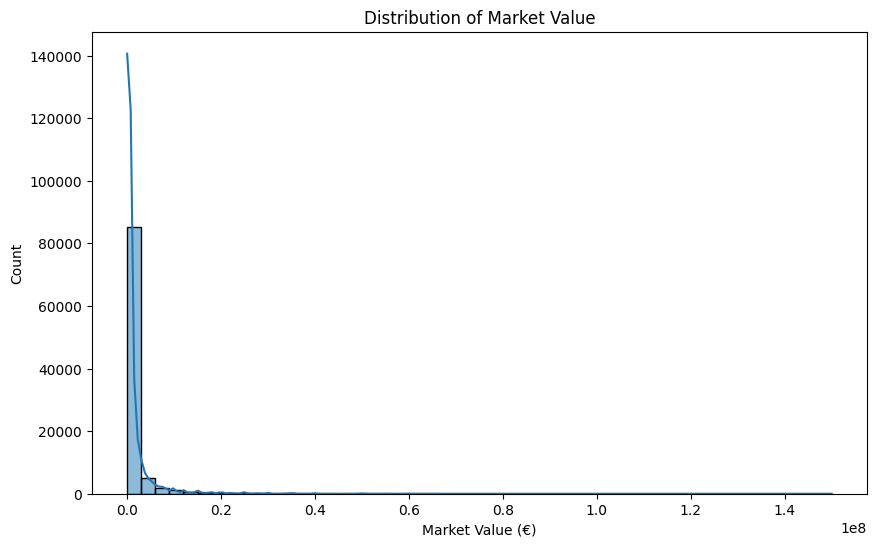

In [ ]:
# Distribution of transfer fees
plt.figure(figsize=(10, 6))
sns.histplot(th['TM Market Value'], bins=50, kde=True)
plt.title('Distribution of Market Value')
plt.xlabel('Market Value (€)')
plt.ylabel('Count')
plt.show()

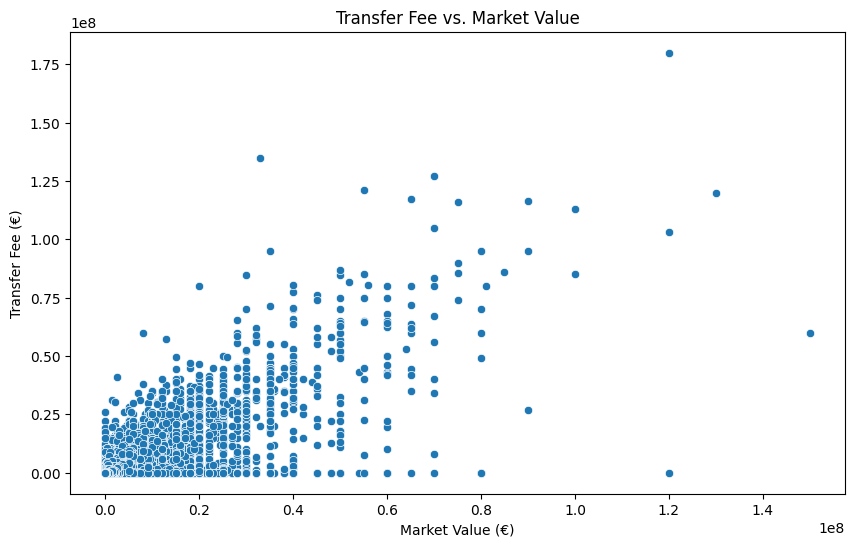

In [ ]:
# Transfer fee vs. market value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=trans_hist['TM Market Value'], y=trans_hist['Transfer Fee'])
plt.title('Transfer Fee vs. Market Value')
plt.xlabel('Market Value (€)')
plt.ylabel('Transfer Fee (€)')
plt.show()

##Relationships Between Datasets

In [47]:
mktv.rename(columns={'verein': 'Club'}, inplace=True)

In [48]:
mktv.head()

,player_id,Age,mw,datum_mw,Club
0,108390,17,50000.0,2009-05-27,KRC Genk U19
1,108390,18,150000.0,2010-07-28,KRC Genk
2,108390,18,1000000.0,2010-10-06,KRC Genk
3,108390,18,2000000.0,2010-12-28,KRC Genk
4,108390,19,3000000.0,2011-05-24,KRC Genk


In [49]:
# Merge datasets to analyze relationships
merged_df1 = pdt.merge(mktv, on='player_id')


In [52]:
merged_df1.columns

Index(['Name', 'player_id', 'Age_x', 'Nationality', 'Position', 'Team',
       'Contract expires', 'Age_y', 'mw', 'datum_mw', 'Club'],
      dtype='object')

In [53]:
merged_df1 = merged_df1[['Name', 'player_id', 'Nationality', 'Position',
       'Contract expires', 'Age_y', 'mw', 'datum_mw', 'Club']]

In [50]:
merged_df2 = pdt.merge(th, on='player_id')

In [51]:
merged_df3 = pdt.merge(mktv, on='player_id').merge(th, on='player_id')

In [54]:
merged_df3.head()

,Name,player_id,Age_x,Nationality,Position,Team,Contract expires,Age_y,mw,datum_mw,Club,futureTransfer,date,from_clubName,to_clubName,upcoming,TM Market Value
0,Thibaut Courtois,108390,31.0,Belgium,Goalkeeper,Real Madrid,2026-06-30,17,50000.0,2009-05-27,KRC Genk U19,0.0,2018-08-09,Chelsea,Real Madrid,False,65000000.0
1,Thibaut Courtois,108390,31.0,Belgium,Goalkeeper,Real Madrid,2026-06-30,17,50000.0,2009-05-27,KRC Genk U19,0.0,2014-06-30,Atlético Madrid,Chelsea,False,25000000.0
2,Thibaut Courtois,108390,31.0,Belgium,Goalkeeper,Real Madrid,2026-06-30,17,50000.0,2009-05-27,KRC Genk U19,0.0,2011-07-27,Chelsea,Atlético Madrid,False,4000000.0
3,Thibaut Courtois,108390,31.0,Belgium,Goalkeeper,Real Madrid,2026-06-30,17,50000.0,2009-05-27,KRC Genk U19,0.0,2011-07-26,KRC Genk,Chelsea,False,4000000.0
4,Thibaut Courtois,108390,31.0,Belgium,Goalkeeper,Real Madrid,2026-06-30,17,50000.0,2009-05-27,KRC Genk U19,0.0,2009-07-01,KRC Genk U19,KRC Genk,False,50000.0


In [61]:
merged_df3.shape

(1604126, 17)

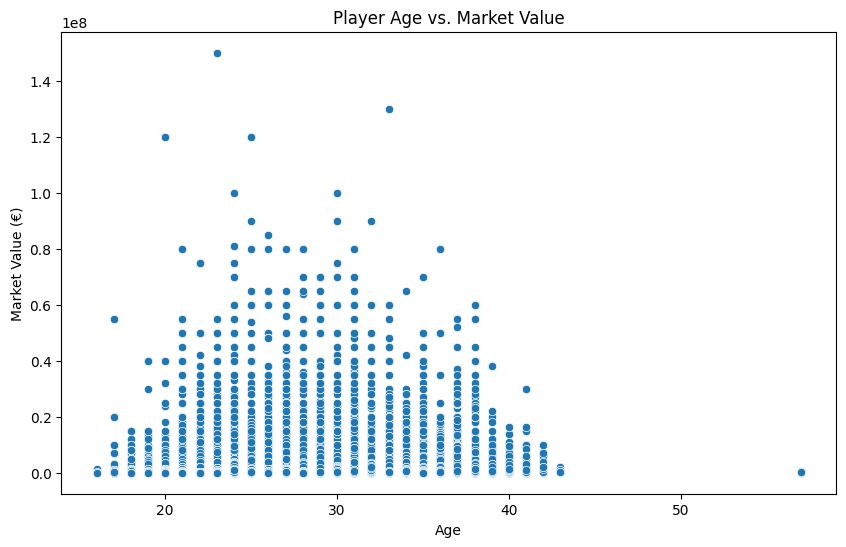

In [55]:
# Relationship between player age and market value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df2['Age'], y=merged_df2['TM Market Value'])
plt.title('Player Age vs. Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
plt.show()

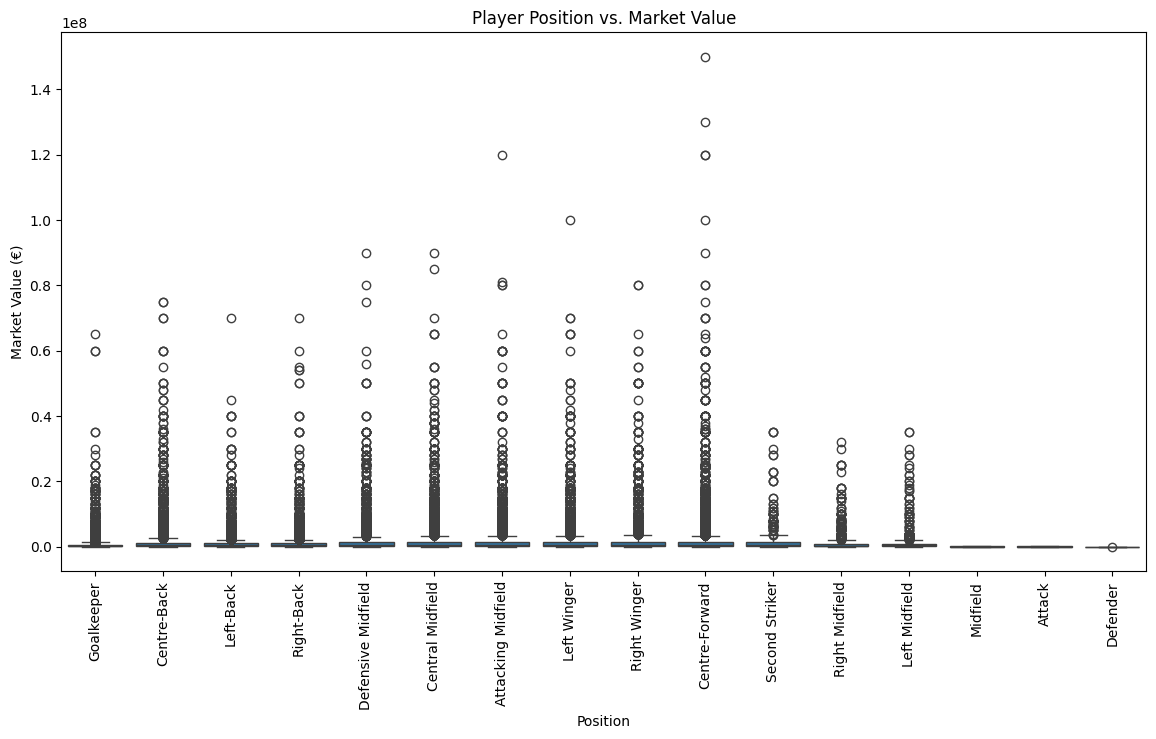

In [ ]:
# Relationship between player position and market value
plt.figure(figsize=(14, 7))
sns.boxplot(x='Position', y='TM Market Value', data=merged_df2)
plt.title('Player Position vs. Market Value')
plt.xlabel('Position')
plt.ylabel('Market Value (€)')
plt.xticks(rotation=90)
plt.show()

##Player Selection

In [78]:
# Selected Player IDs
selected_player_ids = [401923, 357565, 148455, 96341, 45146, 122153, 357662, 295330, 59016, 108390, 581678, 132098, 38253, 241641, 636703 ]

# sel_player_ids = [401923, 357565, 148455, 96341, 45146]
# sel_player_names = [pdt[pdt['player_id'] == player_id]['Name'].values[0] for player_id in sel_player_ids]


In [82]:
# sel_player_names

In [83]:
# Filter player details for selected players
selected_players1 = merged_df1[merged_df1['player_id'].isin(selected_player_ids)]
selected_players2 = merged_df2[merged_df2['player_id'].isin(selected_player_ids)]

In [57]:
selected_players3 = merged_df3[merged_df3['player_id'].isin(selected_player_ids)]

In [58]:
# Sort dates in ascending order
sorted_players = selected_players1.sort_values(by=['player_id','datum_mw'])

print(sorted_players[['Name', 'player_id', 'datum_mw', 'mw']].head())

                    Name  player_id    datum_mw         mw
1101  Robert Lewandowski      38253  2008-03-18   100000.0
1102  Robert Lewandowski      38253  2008-05-19   500000.0
1103  Robert Lewandowski      38253  2008-09-05   800000.0
1104  Robert Lewandowski      38253  2008-12-30  1650000.0
1105  Robert Lewandowski      38253  2009-07-04  3000000.0


In [59]:
sorted_players['Name'].unique()

array(['Robert Lewandowski', 'Mario Balotelli', 'David Alaba',
       'Romelu Lukaku', 'Thibaut Courtois', 'Paul Pogba', 'Harry Kane',
       'Mohamed Salah', 'Bernardo Silva', 'Kelechi Iheanacho', 'Rodri',
       'Declan Rice', 'Victor Osimhen', 'Jude Bellingham', 'Fermín López'],
      dtype=object)

In [60]:
# Sort the DataFrame by player and date to ensure proper plotting
selected_players = selected_players3.sort_values(by=['Name', 'datum_mw'])


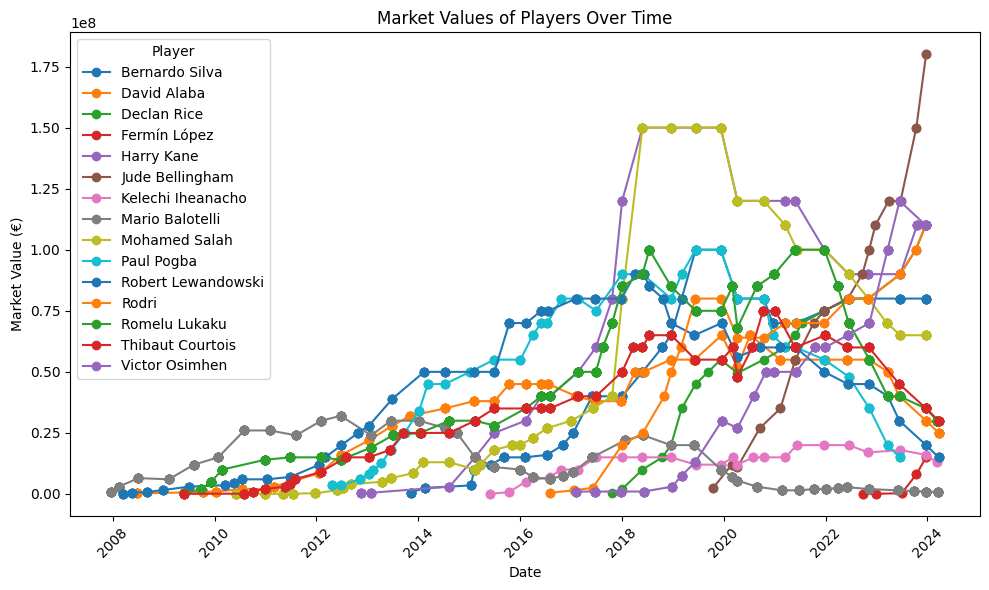

In [ ]:
#  Plotting the market values of the players
plt.figure(figsize=(10, 6))

for player in selected_players['Name'].unique():
    player_data = selected_players[selected_players['Name'] == player]
    plt.plot(player_data['datum_mw'], player_data['mw'], marker='o', label=player)

plt.xlabel('Date')
plt.ylabel('Market Value (€)')
plt.title('Market Values of Players Over Time')
plt.legend(title='Player')
plt.xticks(rotation=45)
plt.tight_layout()


# Show the plot
plt.show()

In [90]:
selected_players.head()

,Name,player_id,Age_x,Nationality,Position,Team,Contract expires,Age_y,mw,datum_mw,Club,futureTransfer,date,from_clubName,to_clubName,upcoming,TM Market Value
449468,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,SL Benfica B,0.0,2017-07-01,Monaco,Man City,False,40000000.0
449469,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,SL Benfica B,0.0,2015-01-20,Benfica,Monaco,False,3500000.0
449470,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,SL Benfica B,0.0,2015-01-19,Monaco,Benfica,False,3500000.0
449471,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,SL Benfica B,0.0,2014-08-07,Benfica,Monaco,False,2500000.0
449472,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,SL Benfica B,0.0,2014-07-01,Benfica B,Benfica,False,2500000.0


In [91]:
selected_players.shape

(2633, 17)

#NLP

##Load Data

In [ ]:
news_feed.head()

,categories,url,title,content,author,date,spider_type,file_name,video_generated
0,['Manchester City'],https://www.mirror.co.uk/sport/football/news/p...,10 most expensive Premier League keepers with ...,"<div id=""readability-page-1"" class=""page""><div...",['Matthew Cooper'],2023-09-25T14:31:18Z,newsnow,2023-09-25-ff8bd382227d41a2daf30561fc952e31,NaN
1,['Manchester United'],https://metro.co.uk/2023/09/25/gran-74-left-sh...,Gran in crash with Marcus Rashford had no idea...,"<div id=""readability-page-1"" class=""page""><div...",['Liam Coleman'],2023-09-25T15:58:13Z,newsnow,2023-09-25-8983ec6c0529664e948ee63d3df06887,NaN
2,['Manchester United'],https://www.manutd.com/en/news/detail/man-utd-...,Match preview: United v Palace,"<div id=""readability-page-1"" class=""page""><div...",['Matthew Holt'],2023-09-25T16:12:33Z,newsnow,2023-09-25-86172d0d6c35e731b5bbc8f0765227a0,NaN
3,['Manchester United'],https://www.teamtalk.com/manchester-united/ten...,Man Utd want €50m LaLiga star in huge January ...,"<div id=""readability-page-1"" class=""page""><div...",['James Marshment'],2023-09-25T15:51:58Z,newsnow,2023-09-25-6068b338d857655d807abd12a38a2308,NaN
4,['Manchester City'],https://www.manchestercity.news/soon-pep-guard...,Pep Guardiola delivers new injury update on Ma...,"<div id=""readability-page-1"" class=""page""><art...",['Tom Procter'],2023-09-25T15:34:43Z,newsnow,2023-09-25-6f24fc4851e39005fff1efd682abd5f4,NaN


In [ ]:
news_feed = news_feed[['title', 'content', 'date']]

In [ ]:
# Convert 'date' column to datetime
news_feed['date'] = pd.to_datetime(news_feed['date'])
news_feed['date_only'] = news_feed['date'].dt.date
news_feed[['date', 'date_only']].head()

,date,date_only
0,2023-09-25 14:31:18+00:00,2023-09-25
1,2023-09-25 15:58:13+00:00,2023-09-25
2,2023-09-25 16:12:33+00:00,2023-09-25
3,2023-09-25 15:51:58+00:00,2023-09-25
4,2023-09-25 15:34:43+00:00,2023-09-25


In [ ]:
news_feed.rename(columns={'date': 'dateTimezone'}, inplace=True)

In [ ]:
news_feed.rename(columns={'date_only': 'date'}, inplace=True)

In [ ]:
news_feed = news_feed[['title', 'content', 'date']]

In [ ]:
news_feed.head()

,title,content,date
0,10 most expensive Premier League keepers with ...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25
1,Gran in crash with Marcus Rashford had no idea...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25
2,Match preview: United v Palace,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25
3,Man Utd want €50m LaLiga star in huge January ...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25
4,Pep Guardiola delivers new injury update on Ma...,"<div id=""readability-page-1"" class=""page""><art...",2023-09-25


In [ ]:
miao_feed.head()

,url,title,author,content,date,title_image,spider_type,summary,mini_summary_cn,keywords,summary_cn,title_cn,mini_summary,file_name,chunks,translations,video_generated
0,https://theathletic.com/4427670/2023/04/19/pio...,Stefano Pioli praises Rafael Leao following AC...,['Omar Garrick'],"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19,https://cdn.theathletic.com/cdn-cgi/image/widt...,theathletic,AC Milan head coach Stefano Pioli says Rafael ...,AC米兰主教练斯特凡诺·皮奥利表示拉斐尔·雷奥正在成为一名“冠军”，在这名边锋的帮助下，米兰...,"['napoli', 'ac milan', 'inter milan', 'olivier...",AC米兰主教练斯特凡诺·皮奥利表示拉斐尔·雷奥正在成为一名“冠军”，在这名边锋的帮助下，米兰...,史蒂芬诺·皮奥利(Stefano Pioli) 对拉斐尔·莱昂(Rafael Leao) 的...,AC Milan head coach Stefano Pioli says Rafael ...,NaN,NaN,NaN,NaN
1,https://www.telegraph.co.uk/football/2023/04/1...,Todd Boehly and Co have nowhere left to go aft...,['Sam Wallace'],"<html><body><div><div class=""component article...",2023-04-19,https://www.telegraph.co.uk/content/dam/footba...,telegraph,[image]Behdad Eghbali and Todd Boehly - Todd B...,托德·博厄利(Todd Boehly)和贝赫达德·艾格拜利(Behdad Eghbali)等...,"['carlo ancelotti', 'kai havertz', 'conor gall...",图片描述：Behdad Eghbali 和 Todd Boehly - Todd Boehl...,托德·博勒(Todd Boehly)等人在切尔西(Chelsea)再次失败后无路可走,[image]Behdad Eghbali and Todd Boehly - Todd B...,NaN,NaN,NaN,NaN
2,https://theathletic.com/4420448/2023/04/19/age...,Agents exam day – and why they are railing aga...,['Dan Sheldon'],"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19,https://cdn.theathletic.com/cdn-cgi/image/widt...,theathletic,"Love them or loathe them, agents are integral ...","不管你喜欢还是讨厌，经纪人对足球界的运作至关重要。\n\n如今，来自138个成员协会的6,5...","['football', 'intermediary transactions list.'...",无论你怎么看待他们，经纪人对于足球运作方式至关重要。\n\n今天，来自138个成员协会的65...,经纪人考试日 - 以及为什么他们抵制国际足联（FIFA）的打压计划,"Love them or loathe them, agents are integral ...",NaN,NaN,NaN,NaN
3,https://theathletic.com/4423822/2023/04/19/geo...,Leeds’ strategy of buying for the future won’t...,['Phil Hay'],"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19,https://cdn.theathletic.com/cdn-cgi/image/widt...,theathletic,"If nothing else, Leeds United’s regression tow...",利兹联最近的困境凸显了他们需要罗伯特·斯诺德格拉斯（Robert Snodgrass）这样一...,"['transfers', 'championship', 'pep guardiola',...",如果说需要证明的话，《利兹联》在西蒙·格雷森担任主教练期间的明显倒退，顶多能让某个人在T恤上...,利兹联（Leeds）为未来购买的战略在无情的英超联赛(Premier League)中行不通,"If nothing else, Leeds United’s regression tow...",NaN,NaN,NaN,NaN
4,https://theathletic.com/4424252/2023/04/19/man...,‘Manchester is deeply pragmatic’: Why the city...,"[""Joey D'Urso""]","<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19,https://cdn.theathletic.com/cdn-cgi/image/widt...,theathletic,"Two months ago, when the Glazer family’s plan ...",据《The Athletic》透露，自称为“曼联支持者之声”的团体一直在游说当地政治家支持卡...,"['homosexuality', 'economic gains', 'human rig...",两个月前，当格雷泽家族出售曼联的计划越来越受重视时，英格兰城市的一些政治人物收到了一封奇怪的...,“曼城高度务实”：为什么这个城市谨慎地接受卡塔尔资金\n\n曼彻斯特(Manchester)...,"A group claiming to be ""Manchester United Supp...",NaN,NaN,NaN,NaN


In [ ]:
miao_feed = miao_feed[['title', 'content', 'date']]

In [ ]:
miao_feed.head()

,title,content,date
0,Stefano Pioli praises Rafael Leao following AC...,"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19
1,Todd Boehly and Co have nowhere left to go aft...,"<html><body><div><div class=""component article...",2023-04-19
2,Agents exam day – and why they are railing aga...,"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19
3,Leeds’ strategy of buying for the future won’t...,"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19
4,‘Manchester is deeply pragmatic’: Why the city...,"<html><body><div><div class=""sc-294a6039-6 fbD...",2023-04-19


In [ ]:
concat_news = merged_feed = pd.concat([news_feed, miao_feed], ignore_index=True)

#SENTIMENT

##Load Libraries

In [84]:
# import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [85]:
# Load the spacy language model
import spacy
spacy.prefer_gpu()

True

In [86]:
import torch
from transformers import pipeline

#  Initialize sentiment analysis pipeline
model='nlptown/bert-base-multilingual-uncased-sentiment'
sentiment_pipeline = pipeline('sentiment-analysis', truncation=True, model=model, device=0 if torch.cuda.is_available() else -1)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


##Text Preprocessing

In [ ]:
# Clean HTML tags and preprocess content
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = text.lower()  # Lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

concat_news['cleaned_content'] = concat_news['content'].apply(preprocess_text)

In [ ]:
concat_news.to_csv('/content/drive/My Drive/concat_news.csv', index=False)

In [ ]:
concat_news = concat_news[['title', 'cleaned_content', 'date']]

In [89]:
concat_news.head()

,title,content,date,cleaned_content
0,10 most expensive Premier League keepers with ...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25,top 10 valuable premier league goalkeeper reve...
1,Gran in crash with Marcus Rashford had no idea...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25,england striker involved crash grandmother yes...
2,Match preview: United v Palace,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25,skip main navigationskip contenthow follow uni...
3,Man Utd want €50m LaLiga star in huge January ...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25,manchester united reportedly weighing january ...
4,Pep Guardiola delivers new injury update on Ma...,"<div id=""readability-page-1"" class=""page""><art...",2023-09-25,pep guardiola gave injury update manchester ci...


In [ ]:
concat_news['cleaned_content'].values[0]

'top 10 valuable premier league goalkeeper revealed liverpool alisson manchester city ederson missing number one spotmanchester city liverpool goalkeeper ederson alissonliverpool star alisson manchester city ederson widely viewed two best goalkeeper world rank among premier league valuable shot stopper well football observatory answer might surprised learn neither alisson ederson take number one spot ranking player value take wide range factor account age contract length form total nine different club represented top 10 arsenal club two player list mirror football give rundown league valuable goalkeeper 10 arijanet muric burnley 20million 17 3m losing spot burnley first choice goalkeeper new signing james trafford aijanet muric probably surprising name list however 24 year old excellent championship last year age fact contract 2026 help boost value 9 emiliano martinez aston villa 20m 17 3m world cup winner argentina last year emiliano martinez developed one best goalkeeper world enjoyi

In [92]:
concat_news.isnull().sum()

,0
title,23
content,0
date,91
cleaned_content,0


In [93]:
concat_news.dropna(subset=['date'],inplace=True)

In [94]:
concat_news['date'] = pd.to_datetime(concat_news['date'], format='mixed', errors='coerce')

<ipython-input-94-fcaadf9f5d8c>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  concat_news['date'] = pd.to_datetime(concat_news['date'], format='mixed', errors='coerce')


In [95]:
# Convert 'date' column to datetime
concat_news['date'] = pd.to_datetime(concat_news['date'], utc=True)

# Extract month and year
concat_news['month'] = concat_news['date'].dt.month
concat_news['year'] = concat_news['date'].dt.year

In [96]:
# Count the occurrences of each unique year
year_counts =concat_news['year'].value_counts().sort_index()


In [97]:
print(year_counts)

year
2011         1
2013         3
2015         2
2017         2
2018         4
2019         3
2020        19
2021        14
2022       101
2023    149894
2024     62719
Name: count, dtype: int64


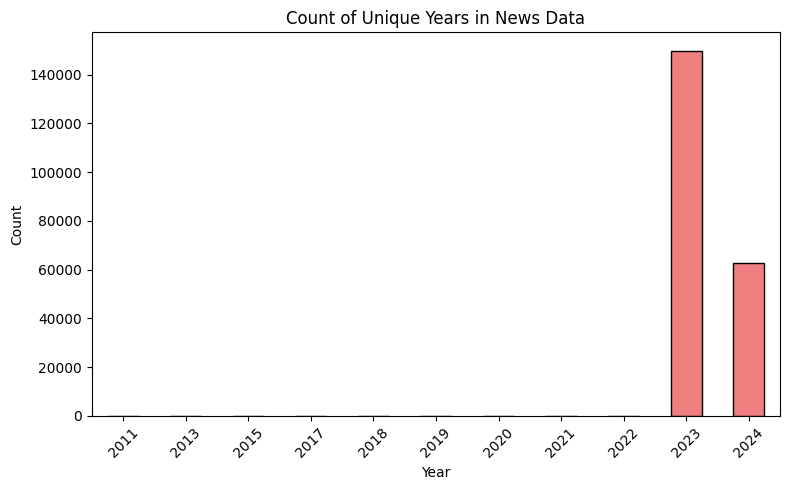

In [98]:
# Plot the counts
plt.figure(figsize=(8, 5))
year_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Unique Years in News Data')
plt.xticks(rotation=45)
plt.tight_layout()


##Feature Engineering

###Extract Month and Year before end of contract

In [99]:
selected_players['datum_mw'] = pd.to_datetime(selected_players['datum_mw'])

In [100]:
# Extract month and year
selected_players['month'] = selected_players['datum_mw'].dt.month
selected_players['year'] = selected_players['datum_mw'].dt.year

In [101]:
selected_players['Contract expires'] = pd.to_datetime(selected_players['Contract expires'])

In [102]:
# Calculate years remaining
selected_players['contract_years_remaining'] = (selected_players['Contract expires'] - pd.to_datetime('today')).dt.days / 365.25

# Calculate months remaining
selected_players['contract_months_remaining'] = (selected_players['Contract expires'] - pd.to_datetime('today')).dt.days / 30.44

In [103]:
selected_players.head()

,Name,player_id,Age_x,Nationality,Position,Team,Contract expires,Age_y,mw,datum_mw,...,futureTransfer,date,from_clubName,to_clubName,upcoming,TM Market Value,month,year,contract_years_remaining,contract_months_remaining
449468,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2017-07-01,Monaco,Man City,False,40000000.0,11,2013,1.700205,20.400788
449469,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2015-01-20,Benfica,Monaco,False,3500000.0,11,2013,1.700205,20.400788
449470,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2015-01-19,Monaco,Benfica,False,3500000.0,11,2013,1.700205,20.400788
449471,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2014-08-07,Benfica,Monaco,False,2500000.0,11,2013,1.700205,20.400788
449472,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2014-07-01,Benfica B,Benfica,False,2500000.0,11,2013,1.700205,20.400788


In [104]:
selected_players.reset_index(drop=True, inplace=True)

In [105]:
selected_players.shape

(2633, 21)

In [106]:
# List of player names to search for
player_names = selected_players['Name']

In [107]:
player_names.head()

,Name
0,Bernardo Silva
1,Bernardo Silva
2,Bernardo Silva
3,Bernardo Silva
4,Bernardo Silva


###Filter News and Extract Sentences

In [108]:
# Filter news articles containing any of the selected player names
filtered_news_df = concat_news[concat_news['title'].str.contains('|'.join(player_names), case=False, na=False)]


In [109]:
filtered_news_df.shape

(4668, 6)

In [110]:
filtered_news_df.head()

,title,content,date,cleaned_content,month,year
26,Former ref explains how Casemiro played a role...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25 00:00:00+00:00,manchester united midfielder casemiro red card...,9,2023
66,"De Bruyne, Rodri and the Man City players rule...","<div id=""readability-page-1"" class=""page""><p>P...",2023-09-26 00:00:00+00:00,pep guardiola plenty option disaposal missing ...,9,2023
77,Report shares more bad news for Manchester Cit...,"<div id=""readability-page-1"" class=""page""><art...",2023-09-26 00:00:00+00:00,manchester city handed bad news regard upcomin...,9,2023
83,Injury scare avoided?! Arsenal believe Declan ...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-26 00:00:00+00:00,scoresnewstransferscommunitytablesopinionanaly...,9,2023
85,Declan Rice injury boost allows Arsenal to avo...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-26 00:00:00+00:00,arsenal got first glimpse life without declan ...,9,2023


In [111]:
# Find the earliest and latest news dates
earliest_date = filtered_news_df['date'].min()
latest_date = filtered_news_df['date'].max()

print("Earliest news date:", earliest_date)
print("Latest news date:", latest_date)


Earliest news date: 2022-01-14 10:18:00+00:00
Latest news date: 2024-06-23 19:25:54+00:00


In [112]:
# Compile a regex pattern to match any player name
player_pattern = re.compile("|".join(player_names), re.IGNORECASE)

In [113]:
# Function to extract sentences containing player names
def extract_player_sentences(text, players):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?]) +', text)
    # Find sentences mentioning any of the players
    player_sentences = [sent for sent in sentences if player_pattern.search(sent)]
    return player_sentences

# Apply the function to extract sentences containing player names
filtered_news_df['player_sentences'] = filtered_news_df['cleaned_content'].apply(lambda x: extract_player_sentences(x, player_names))


<ipython-input-113-5a11eb162b91>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_news_df['player_sentences'] = filtered_news_df['cleaned_content'].apply(lambda x: extract_player_sentences(x, player_names))


In [114]:
# Flatten list of sentences for sentiment analysis
player_sentences = [sent for sublist in filtered_news_df['player_sentences'] for sent in sublist]


In [115]:
filtered_news_df.head()

,title,content,date,cleaned_content,month,year,player_sentences
26,Former ref explains how Casemiro played a role...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-25 00:00:00+00:00,manchester united midfielder casemiro red card...,9,2023,[manchester united midfielder casemiro red car...
66,"De Bruyne, Rodri and the Man City players rule...","<div id=""readability-page-1"" class=""page""><p>P...",2023-09-26 00:00:00+00:00,pep guardiola plenty option disaposal missing ...,9,2023,[pep guardiola plenty option disaposal missing...
77,Report shares more bad news for Manchester Cit...,"<div id=""readability-page-1"" class=""page""><art...",2023-09-26 00:00:00+00:00,manchester city handed bad news regard upcomin...,9,2023,[manchester city handed bad news regard upcomi...
83,Injury scare avoided?! Arsenal believe Declan ...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-26 00:00:00+00:00,scoresnewstransferscommunitytablesopinionanaly...,9,2023,[]
85,Declan Rice injury boost allows Arsenal to avo...,"<div id=""readability-page-1"" class=""page""><div...",2023-09-26 00:00:00+00:00,arsenal got first glimpse life without declan ...,9,2023,[arsenal got first glimpse life without declan...


In [ ]:
filtered_news_df['player_sentences'].iloc[0]

['manchester united midfielder casemiro red card last season crystal palace set precedent meant manchester city star rodri sent saturday afternoon casemiro given marching order old trafford back february brazilian grabbed palace midfielder hughes throat set player involved melee initially spotted field referee var picked sent midfielder seven month incident used example former referee dermot gallagher asked rodri sent nottingham forest weekend altercation spaniard morgan gibbs white rodri moved hand towards throat forest man read neville slam rodri red card read casemiro fernandes goal referee anthony taylor decided show rodri straight red card decision overturned var discussing decision sky sport ref watch gallagher explained taylor call correct using casemiro example found referee handbook gallagher asked page 52 casemiro hughes thing grab throat red card wanted consistency think put arm around player throat run massive massive risk referee see rodri ban mean miss crucial clash city 

##Sentiment Analysis on Extracted Sentences

In [117]:
# Perform sentiment analysis on each extracted sentence
sentiment_results = sentiment_pipeline(player_sentences)

In [118]:
# Combine sentences with sentiment results
player_sentiment_df = pd.DataFrame({
    'sentence': player_sentences,
    'sentiment': [res['label'] for res in sentiment_results],
    'score': [res['score'] for res in sentiment_results]

})

# Find corresponding dates for each sentence (this is more efficient and accurate)
player_sentiment_df['date'] = player_sentiment_df['sentence'].apply(lambda sent: filtered_news_df.loc[filtered_news_df['player_sentences'].apply(lambda x: sent in x), 'date'].iloc[0] if filtered_news_df.loc[filtered_news_df['player_sentences'].apply(lambda x: sent in x), 'date'].any() else None)

# Extract month and year from the 'date' column if needed
player_sentiment_df['month'] = pd.to_datetime(player_sentiment_df['date']).dt.month
player_sentiment_df['year'] = pd.to_datetime(player_sentiment_df['date']).dt.year

<ipython-input-118-23afc4776564>:10: FutureWarning: 'any' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).any() instead.
  player_sentiment_df['date'] = player_sentiment_df['sentence'].apply(lambda sent: filtered_news_df.loc[filtered_news_df['player_sentences'].apply(lambda x: sent in x), 'date'].iloc[0] if filtered_news_df.loc[filtered_news_df['player_sentences'].apply(lambda x: sent in x), 'date'].any() else None)


In [119]:
# Map the sentiments
sentiment_mapping = {
    '1 star': 'Negative',
    '2 stars': 'Negative',
    '3 stars': 'Neutral',
    '4 stars': 'Positive',
    '5 stars': 'Positive'
}
# Apply the mapping to create the 'mapped_sentiment' column
player_sentiment_df['mapped_sentiment'] = player_sentiment_df['sentiment'].map(sentiment_mapping)


In [120]:
# Display the player-specific sentiment results
print(player_sentiment_df.head())

                                            sentence sentiment     score  \
0  manchester united midfielder casemiro red card...    1 star  0.575949   
1  pep guardiola plenty option disaposal missing ...    1 star  0.473535   
2  manchester city handed bad news regard upcomin...    1 star  0.526720   
3  arsenal got first glimpse life without declan ...    1 star  0.531708   
4  jurgen klopp could trying turn ryan gravenberc...   3 stars  0.279942   

                       date  month  year mapped_sentiment  
0 2023-09-25 00:00:00+00:00      9  2023         Negative  
1 2023-09-26 00:00:00+00:00      9  2023         Negative  
2 2023-09-26 00:00:00+00:00      9  2023         Negative  
3 2023-09-26 00:00:00+00:00      9  2023         Negative  
4 2023-09-26 00:00:00+00:00      9  2023          Neutral  


In [121]:
# Compile a regex pattern to match any player name (with word boundaries)
player_pattern = re.compile(r'\b(?:' + '|'.join(player_names) + r')\b', re.IGNORECASE)


In [122]:
# Function to extract player names from a sentence
def extract_players_from_sentence(sentence):
    # Find all matches for player names in the sentence
    matches = player_pattern.findall(sentence)
    # Convert matches to a unique list of player names
    unique_players = list(set(matches))
    return unique_players if unique_players else None

# Apply the function to extract player names for each sentence
player_sentiment_df['Name'] = player_sentiment_df['sentence'].apply(extract_players_from_sentence)


In [123]:
print(player_sentiment_df.head())

                                            sentence sentiment     score  \
0  manchester united midfielder casemiro red card...    1 star  0.575949   
1  pep guardiola plenty option disaposal missing ...    1 star  0.473535   
2  manchester city handed bad news regard upcomin...    1 star  0.526720   
3  arsenal got first glimpse life without declan ...    1 star  0.531708   
4  jurgen klopp could trying turn ryan gravenberc...   3 stars  0.279942   

                       date  month  year mapped_sentiment  \
0 2023-09-25 00:00:00+00:00      9  2023         Negative   
1 2023-09-26 00:00:00+00:00      9  2023         Negative   
2 2023-09-26 00:00:00+00:00      9  2023         Negative   
3 2023-09-26 00:00:00+00:00      9  2023         Negative   
4 2023-09-26 00:00:00+00:00      9  2023          Neutral   

                                   Name  
0                               [rodri]  
1                               [rodri]  
2  [rodri, bernardo silva, declan rice]  
3       

In [124]:
# Expand rows to handle multiple player mentions in a new DataFrame
expanded_df = player_sentiment_df.explode('Name').reset_index(drop=True)

In [125]:
# Display the dataframe with extracted player names
print(expanded_df.head())

                                            sentence sentiment     score  \
0  manchester united midfielder casemiro red card...    1 star  0.575949   
1  pep guardiola plenty option disaposal missing ...    1 star  0.473535   
2  manchester city handed bad news regard upcomin...    1 star  0.526720   
3  manchester city handed bad news regard upcomin...    1 star  0.526720   
4  manchester city handed bad news regard upcomin...    1 star  0.526720   

                       date  month  year mapped_sentiment            Name  
0 2023-09-25 00:00:00+00:00      9  2023         Negative           rodri  
1 2023-09-26 00:00:00+00:00      9  2023         Negative           rodri  
2 2023-09-26 00:00:00+00:00      9  2023         Negative           rodri  
3 2023-09-26 00:00:00+00:00      9  2023         Negative  bernardo silva  
4 2023-09-26 00:00:00+00:00      9  2023         Negative     declan rice  


In [126]:
# Create a mapping of player names to player IDs
name_to_id = dict(zip(selected_players['Name'].str.strip().str.lower(), selected_players['player_id']))


In [127]:
print(dict(list(name_to_id.items())[:5]))

{'bernardo silva': 241641, 'david alaba': 59016, 'declan rice': 357662, 'fermín lópez': 636703, 'harry kane': 132098}


In [128]:
# Normalize the names in the 'Name' column to title case and remove extra spaces
expanded_df['Name'] = expanded_df['Name'].str.strip().str.lower()


In [129]:
# Map the names to player IDs
expanded_df['player_id'] = expanded_df['Name'].map(name_to_id)

In [130]:
expanded_df.sort_values(by=['Name', 'date'], inplace=True)

In [131]:
print(expanded_df.head())

                                               sentence sentiment     score  \
2186  manchester city midfielder bernardo silva say ...    1 star  0.567179   
2203  image jude bellingham borussia dortmund gestur...    1 star  0.519553   
2207  image reason jurgen klopp red mist jurgen klop...    1 star  0.742500   
2222  paris st germain exploring whether make fresh ...    1 star  0.508725   
2235  hour match pocket fan killed time taking strol...    1 star  0.538811   

                          date  month  year mapped_sentiment            Name  \
2186 2023-04-19 00:00:00+00:00      4  2023         Negative  bernardo silva   
2203 2023-05-03 00:00:00+00:00      5  2023         Negative  bernardo silva   
2207 2023-05-03 00:00:00+00:00      5  2023         Negative  bernardo silva   
2222 2023-05-17 00:00:00+00:00      5  2023         Negative  bernardo silva   
2235 2023-05-18 01:19:45+00:00      5  2023         Negative  bernardo silva   

      player_id  
2186   241641.0  
2203   2

##Data Integration

In [132]:
selected_players.head()

,Name,player_id,Age_x,Nationality,Position,Team,Contract expires,Age_y,mw,datum_mw,...,futureTransfer,date,from_clubName,to_clubName,upcoming,TM Market Value,month,year,contract_years_remaining,contract_months_remaining
0,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2017-07-01,Monaco,Man City,False,40000000.0,11,2013,1.700205,20.400788
1,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2015-01-20,Benfica,Monaco,False,3500000.0,11,2013,1.700205,20.400788
2,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2015-01-19,Monaco,Benfica,False,3500000.0,11,2013,1.700205,20.400788
3,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2014-08-07,Benfica,Monaco,False,2500000.0,11,2013,1.700205,20.400788
4,Bernardo Silva,241641,29.0,Portugal,Attacking Midfield,Manchester City,2026-06-30,19,600000.0,2013-11-08,...,0.0,2014-07-01,Benfica B,Benfica,False,2500000.0,11,2013,1.700205,20.400788


In [133]:
print(expanded_df.loc[expanded_df['player_id'].isnull()])

                                               sentence sentiment     score  \
2226  former real madrid everton playmaker james rod...    1 star  0.482882   
2242  priority leeds united medical team week find w...    1 star  0.661880   
2256  better way sum last season say end leeds unite...    1 star  0.641126   
2439  cristiano ronaldo georgina rodriguez pre nup s...    1 star  0.659637   
4203  lionel messi score first half hat trick maxi r...   5 stars  0.347295   
...                                                 ...       ...       ...   
5591  nonetottenham hampered race top four fulham st...    1 star  0.272299   
5872  follow live coverage canada v trinidad tobago ...    1 star  0.403549   
5881  nonemohamed salah year left contract future re...    1 star  0.616490   
2157  german fuentes rodriguez centre action argenti...    1 star  0.461705   
5972  rodrigo bentancur used racial slur uruguayan t...    1 star  0.628635   

                          date  month  year mapped_

In [134]:
expanded_df.dropna(subset=['player_id'], inplace=True)

In [135]:
expanded_df.shape

(5912, 9)

In [136]:
expanded_df.head()

,sentence,sentiment,score,date,month,year,mapped_sentiment,Name,player_id
2186,manchester city midfielder bernardo silva say ...,1 star,0.567179,2023-04-19 00:00:00+00:00,4,2023,Negative,bernardo silva,241641.0
2203,image jude bellingham borussia dortmund gestur...,1 star,0.519553,2023-05-03 00:00:00+00:00,5,2023,Negative,bernardo silva,241641.0
2207,image reason jurgen klopp red mist jurgen klop...,1 star,0.742500,2023-05-03 00:00:00+00:00,5,2023,Negative,bernardo silva,241641.0
2222,paris st germain exploring whether make fresh ...,1 star,0.508725,2023-05-17 00:00:00+00:00,5,2023,Negative,bernardo silva,241641.0
2235,hour match pocket fan killed time taking strol...,1 star,0.538811,2023-05-18 01:19:45+00:00,5,2023,Negative,bernardo silva,241641.0


In [137]:
# Convert 'player_id' in expanded_df to int64 to match selected_players
expanded_df['player_id'] = expanded_df['player_id'].astype('int64')

In [138]:
# Merge dataframes on 'Name', 'month', and 'year' columns
merged_df = pd.merge(expanded_df, selected_players, on=['player_id', 'month', 'year'], how='inner')


In [139]:
merged_df.head()

,sentence,sentiment,score,date_x,month,year,mapped_sentiment,Name_x,player_id,Name_y,...,datum_mw,Club,futureTransfer,date_y,from_clubName,to_clubName,upcoming,TM Market Value,contract_years_remaining,contract_months_remaining
0,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2023-06-20,Manchester City,0.0,2017-07-01,Monaco,Man City,False,40000000.0,1.700205,20.400788
1,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2023-06-20,Manchester City,0.0,2015-01-20,Benfica,Monaco,False,3500000.0,1.700205,20.400788
2,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2023-06-20,Manchester City,0.0,2015-01-19,Monaco,Benfica,False,3500000.0,1.700205,20.400788
3,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2023-06-20,Manchester City,0.0,2014-08-07,Benfica,Monaco,False,2500000.0,1.700205,20.400788
4,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2023-06-20,Manchester City,0.0,2014-07-01,Benfica B,Benfica,False,2500000.0,1.700205,20.400788


In [140]:
# Shift the market value to get the previous month's value
merged_df['previous_value'] = merged_df.groupby('player_id')['mw'].shift(1)

In [141]:
#  Calculate the absolute market value change between successive months
merged_df['market_value_change'] = merged_df['mw'] - merged_df['previous_value']

In [142]:
# Lagged sentiment calculation
merged_df['lagged_score'] = merged_df.groupby('player_id')['score'].shift(1)

In [143]:
merged_df.dropna(inplace=True)

In [144]:
df = merged_df.copy()

In [145]:
df.head()

,sentence,sentiment,score,date_x,month,year,mapped_sentiment,Name_x,player_id,Name_y,...,date_y,from_clubName,to_clubName,upcoming,TM Market Value,contract_years_remaining,contract_months_remaining,previous_value,market_value_change,lagged_score
1,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2015-01-20,Benfica,Monaco,False,3500000.0,1.700205,20.400788,80000000.0,0.0,0.486429
2,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2015-01-19,Monaco,Benfica,False,3500000.0,1.700205,20.400788,80000000.0,0.0,0.486429
3,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2014-08-07,Benfica,Monaco,False,2500000.0,1.700205,20.400788,80000000.0,0.0,0.486429
4,paris saint germain join manchester united rac...,1 star,0.486429,2023-06-10 00:32:23+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2014-07-01,Benfica B,Benfica,False,2500000.0,1.700205,20.400788,80000000.0,0.0,0.486429
5,psg plot swoop man city star bernardo silva po...,1 star,0.394063,2023-06-10 05:43:51+00:00,6,2023,Negative,bernardo silva,241641,Bernardo Silva,...,2017-07-01,Monaco,Man City,False,40000000.0,1.700205,20.400788,80000000.0,0.0,0.486429


In [146]:
df.shape

(5647, 30)

In [147]:
df.duplicated().sum()

235

In [148]:
df.isnull().sum()

,0
sentence,0
sentiment,0
score,0
date_x,0
month,0
year,0
mapped_sentiment,0
Name_x,0
player_id,0
Name_y,0


In [149]:
df.drop_duplicates(inplace=True)

In [150]:
df.dropna( inplace=True)

#Pattern Recognition and model Development

##Model Development

In [151]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [152]:
df.columns

Index(['sentence', 'sentiment', 'score', 'date_x', 'month', 'year',
       'mapped_sentiment', 'Name_x', 'player_id', 'Name_y', 'Age_x',
       'Nationality', 'Position', 'Team', 'Contract expires', 'Age_y', 'mw',
       'datum_mw', 'Club', 'futureTransfer', 'date_y', 'from_clubName',
       'to_clubName', 'upcoming', 'TM Market Value',
       'contract_years_remaining', 'contract_months_remaining',
       'previous_value', 'market_value_change', 'lagged_score'],
      dtype='object')

In [153]:
# Define features and target
features = [  'Nationality','Position', 'Team', 'futureTransfer', 'upcoming', 'Age_y', 'Club',
             'contract_years_remaining', 'lagged_score']
target = 'mw'

In [154]:
# Define X and y
X = df[features]
y = df[target]

In [155]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=42)
}

In [157]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [ 'Age_y', 'futureTransfer', 'contract_years_remaining', 'lagged_score']),
        ('cat', OneHotEncoder(), ['upcoming', 'Team','Position', 'Club', 'Nationality'])
    ]
)


In [214]:
# Dictionary to store results
results = {}

# Loop over models and evaluate
for model_name, model in models.items():
    # Create a pipeline with the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Define parameter grids for each model
    if model_name == 'RandomForest':
        param_dist = {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    elif model_name == 'XGBoost':
        param_dist = {
            'model__n_estimators': [10, 200, 300],
            'model__max_depth': [3, 6, 10],
            'model__learning_rate': [0.01, 0.1, 0.3]
        }
    elif model_name == 'SVR':
        param_dist = {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf', 'poly'],
            'model__gamma': ['scale', 'auto']
        }
    else:
        param_dist = {}  # Linear Regression doesn't need hyperparameter tuning

    # Initialize RandomizedSearchCV if parameter grid is defined
    if param_dist:
        random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=10, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        best_pipeline = random_search.best_estimator_
        best_params = random_search.best_params_
    else:
        # Fit directly for models like LinearRegression (no tuning needed)
        best_pipeline = pipeline.fit(X_train, y_train)
        best_params = "Default parameters used"

    # Predict on the test set
    y_pred = best_pipeline.predict(X_test)

    # Model Performance Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'Best Parameters': best_params,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

    # Print results for each model
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {best_params}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}\n")


Model: RandomForest
Best Hyperparameters: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 30}
Mean Absolute Error: 826014.1238151673
Mean Squared Error: 8365619809302.497
Root Mean Squared Error: 2892338.121538092
R^2 Score: 0.9932354395260379

Model: LinearRegression
Best Hyperparameters: Default parameters used
Mean Absolute Error: 2485499.403711798
Mean Squared Error: 21410490363310.22
Root Mean Squared Error: 4627147.10845789
R^2 Score: 0.9826871696130939

Model: SVR
Best Hyperparameters: {'model__kernel': 'linear', 'model__gamma': 'auto', 'model__C': 10}
Mean Absolute Error: 26899167.02603101
Mean Squared Error: 1236192966787400.2
Root Mean Squared Error: 35159535.9296365
R^2 Score: 0.00039659081551102204

Model: XGBoost
Best Hyperparameters: {'model__n_estimators': 300, 'model__max_depth': 10, 'model__learning_rate': 0.1}
Mean Absolute Error: 881753.3066712834
Mean Squared Error: 11591465366469.297
Root Mean Squared Er

In [ ]:
if not os.path.exists('/content/Results'):
    os.makedirs('/content/Results')

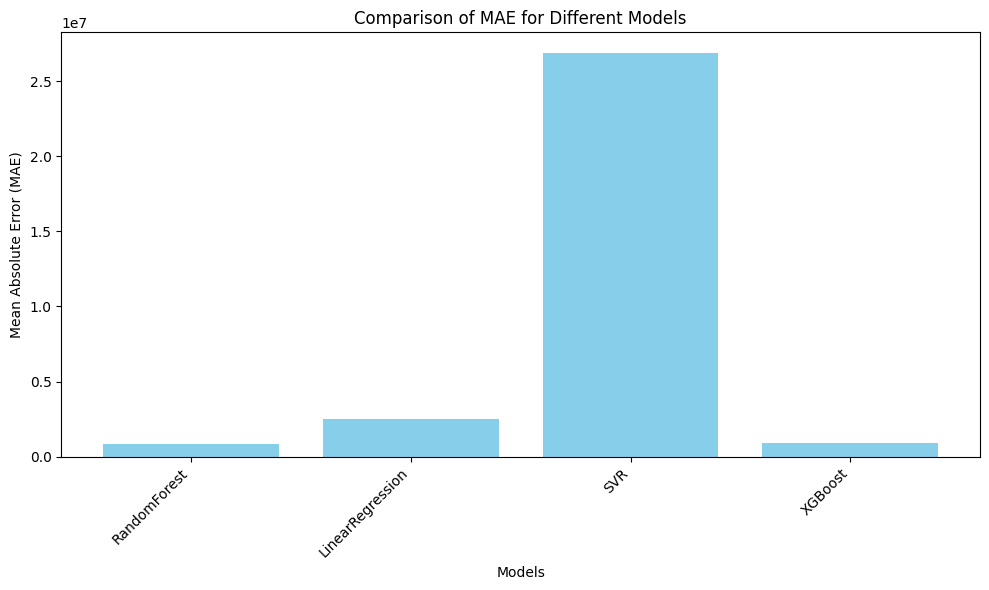

<Figure size 640x480 with 0 Axes>

In [177]:
# Extract MAE values and model names from the 'results' dictionary
model_names = list(results.keys())
mae_values = [result['MAE'] for result in results.values()]

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(model_names, mae_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE for Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('/content/Results/MAE_for_Different_Models.png')

##Correlation Analysis and Feature Selection

In [170]:
# Calculate the correlation matrix only for numeric features
df[features + [target]].select_dtypes(include=np.number).corr()

,futureTransfer,Age_y,contract_years_remaining,lagged_score,mw
futureTransfer,1.000000,0.053643,-0.155941,0.049050,-0.120869
Age_y,0.053643,1.000000,-0.728354,0.146422,-0.730324
contract_years_remaining,-0.155941,-0.728354,1.000000,-0.247328,0.833968
lagged_score,0.049050,0.146422,-0.247328,1.000000,-0.240428
mw,-0.120869,-0.730324,0.833968,-0.240428,1.000000


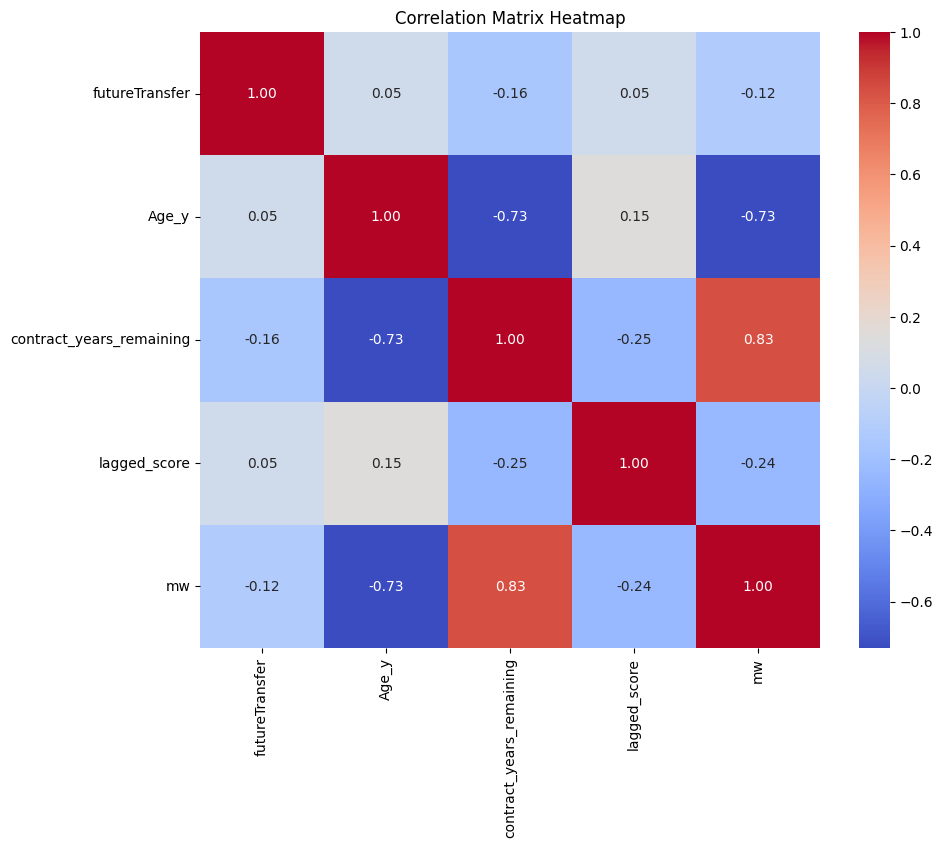

In [171]:
# Calculate the correlation matrix only for numeric features
corr_matrix = df[features + [target]].select_dtypes(include=np.number).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [174]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoders
le_position = LabelEncoder()
le_club = LabelEncoder()

# Fit and transform the Position and Club columns
df['encoded_position'] = le_position.fit_transform(df['Position'])
df['encoded_nationality'] = le_club.fit_transform(df['Nationality'])
df['encoded_team'] = le_club.fit_transform(df['Team'])
df['encoded_upcoming'] = le_club.fit_transform(df['upcoming'])
df['encoded_club'] = le_club.fit_transform(df['Club'])


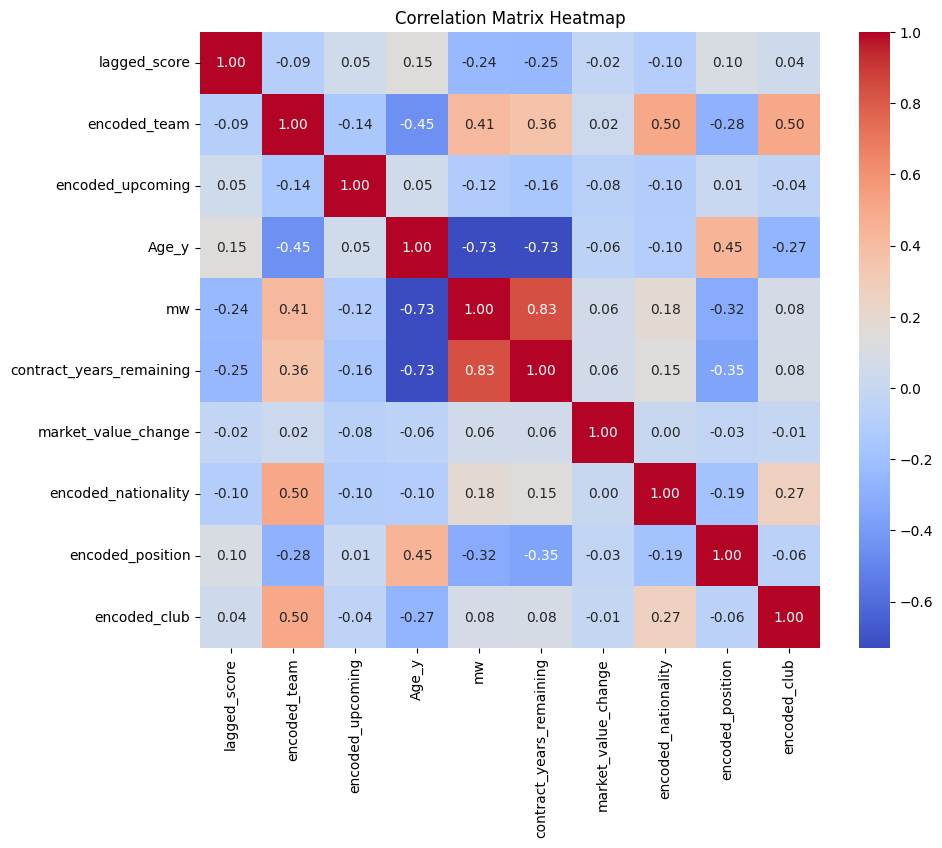

<Figure size 640x480 with 0 Axes>

In [176]:
# Calculate the correlation with encoded Position and Club
columns_to_correlate = ['lagged_score','encoded_team','encoded_upcoming', 'Age_y', 'mw','contract_years_remaining','market_value_change','encoded_nationality', 'encoded_position', 'encoded_club']

# Compute correlation matrix
correlation_matrix = df[columns_to_correlate].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

plt.savefig('/content/Results/Correlation_Matrix_Heatmap.png')

##Feature Interaction

In [178]:
from sklearn.preprocessing import PolynomialFeatures

In [180]:
# Select the features you want to create interactions between
interaction_features = df[['encoded_position', 'lagged_score','encoded_nationality', 'encoded_team', 'encoded_upcoming', 'encoded_club']]


In [181]:
# Initialize PolynomialFeatures for interaction terms (degree=2 for pairwise interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)


In [182]:
# Create interaction features
interaction_terms = poly.fit_transform(interaction_features)


In [183]:
# Convert the interaction terms into a DataFrame for easier viewing
interaction_columns = poly.get_feature_names_out(interaction_features.columns)
interaction_df = pd.DataFrame(interaction_terms, columns=interaction_columns)


In [184]:
# Concatenate the interaction features with the original dataset
df_interactions = pd.concat([df, interaction_df], axis=1)

In [185]:
df_interactions.columns

Index(['sentence', 'sentiment', 'score', 'date_x', 'month', 'year',
       'mapped_sentiment', 'Name_x', 'player_id', 'Name_y', 'Age_x',
       'Nationality', 'Position', 'Team', 'Contract expires', 'Age_y', 'mw',
       'datum_mw', 'Club', 'futureTransfer', 'date_y', 'from_clubName',
       'to_clubName', 'upcoming', 'TM Market Value',
       'contract_years_remaining', 'contract_months_remaining',
       'previous_value', 'market_value_change', 'lagged_score',
       'encoded_position', 'encoded_nationality', 'encoded_team',
       'encoded_upcoming', 'encoded_club', 'encoded_position', 'lagged_score',
       'encoded_nationality', 'encoded_team', 'encoded_upcoming',
       'encoded_club', 'encoded_position lagged_score',
       'encoded_position encoded_nationality', 'encoded_position encoded_team',
       'encoded_position encoded_upcoming', 'encoded_position encoded_club',
       'lagged_score encoded_nationality', 'lagged_score encoded_team',
       'lagged_score encoded_upcoming

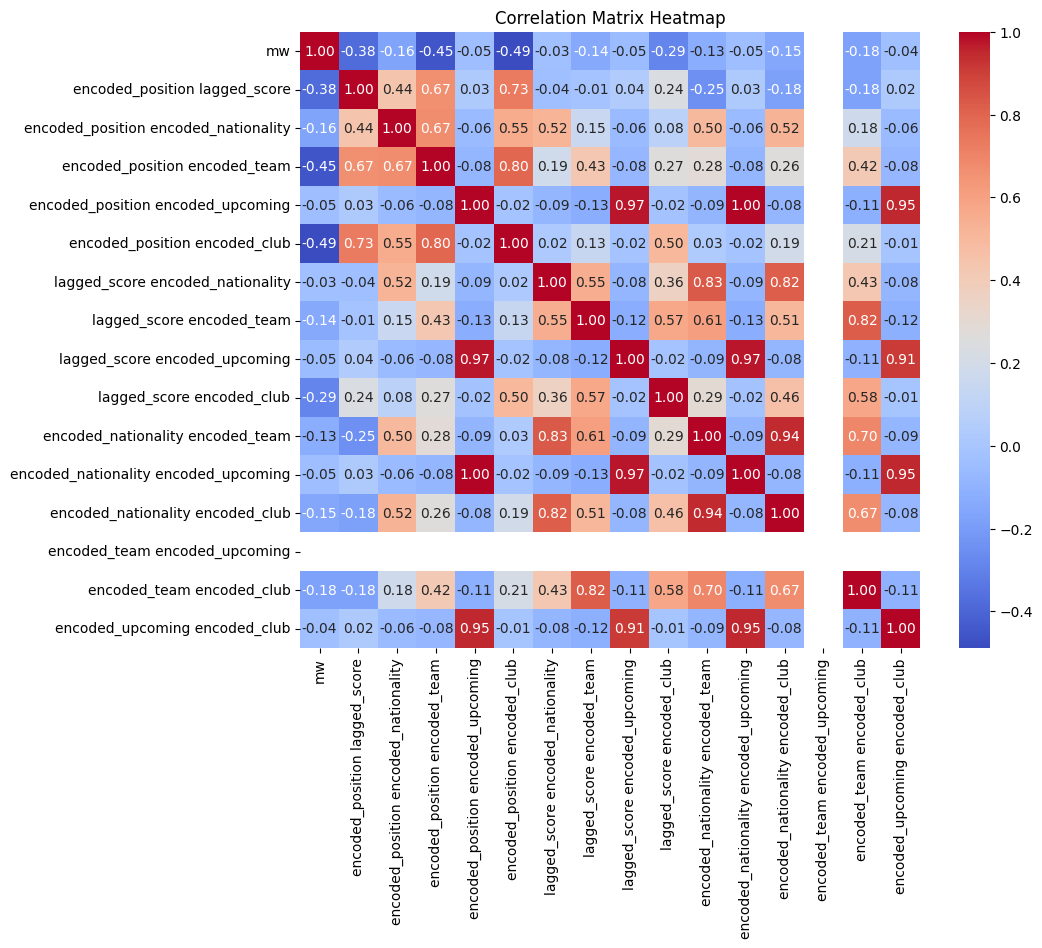

In [187]:
# Calculate the correlation with encoded Position and Club
columns_to_correlate = ['mw', 'encoded_position lagged_score',
       'encoded_position encoded_nationality', 'encoded_position encoded_team',
       'encoded_position encoded_upcoming', 'encoded_position encoded_club',
       'lagged_score encoded_nationality', 'lagged_score encoded_team',
       'lagged_score encoded_upcoming', 'lagged_score encoded_club',
       'encoded_nationality encoded_team',
       'encoded_nationality encoded_upcoming',
       'encoded_nationality encoded_club', 'encoded_team encoded_upcoming',
       'encoded_team encoded_club', 'encoded_upcoming encoded_club']

# Compute correlation matrix
correlation_matrix = df_interactions[columns_to_correlate].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

##Calculating and Plotting the Residual

In [191]:
#  Predict market values on the full dataset
df['predicted_market_value'] = best_pipeline.predict(X)

In [192]:
# Calculate residuals (difference between predicted and actual market values)
df['residual'] = df['predicted_market_value'] - df['mw']

In [193]:
#  Identify undervalued players (residual > 0)
undervalued_players = df[df['residual'] > 0].sort_values(by='residual', ascending=False)


In [194]:
undervalued_players = undervalued_players.sort_values(by=['Name_y', 'Age_y'], ascending=[True, False])

In [195]:
undervalued_players = undervalued_players.drop_duplicates(subset=['Name_y'], keep='first')

In [196]:
undervalued_players.groupby(['Name_y', 'Age_y']).agg({'residual': 'mean'}).sort_values(by='residual', ascending=True).head(10)

,,residual
Name_y,Age_y,
Fermín López,20,7634.000
Mohamed Salah,31,15016.000
David Alaba,31,16074.000
Romelu Lukaku,30,18020.000
Bernardo Silva,29,31648.000
Kelechi Iheanacho,27,34067.000
Harry Kane,30,41568.000
Paul Pogba,30,47038.000
Mario Balotelli,33,62175.875


In [197]:
# Sort the dataframe by 'residual' in descending order
undervalued_sorted = undervalued_players.sort_values(by='residual', ascending=False)

In [198]:
# Display the sorted top 10 most undervalued players
top_10_undervalued = undervalued_sorted[['Name_y', 'mw', 'predicted_market_value', 'residual']].head(10)
top_10_undervalued.head(10)

,Name_y,mw,predicted_market_value,residual
3089,Jude Bellingham,150000000.0,1.796223e+08,2.962229e+07
5367,Thibaut Courtois,35000000.0,4.497999e+07,9.979992e+06
1039,Declan Rice,100000000.0,1.099319e+08,9.931904e+06
5567,Victor Osimhen,110000000.0,1.188721e+08,8.872088e+06
4132,Rodri,100000000.0,1.078996e+08,7.899560e+06
3956,Robert Lewandowski,15000000.0,1.875062e+07,3.750616e+06
3260,Mario Balotelli,1200000.0,1.262176e+06,6.217588e+04
3835,Paul Pogba,15000000.0,1.504704e+07,4.703800e+04
1829,Harry Kane,110000000.0,1.100416e+08,4.156800e+04
3205,Kelechi Iheanacho,16000000.0,1.603407e+07,3.406700e+04


In [199]:
print(undervalued_players['Name_y'].nunique())
print(undervalued_players['Name_y'].unique())


15
['Bernardo Silva' 'David Alaba' 'Declan Rice' 'Fermín López' 'Harry Kane'
 'Jude Bellingham' 'Kelechi Iheanacho' 'Mario Balotelli' 'Mohamed Salah'
 'Paul Pogba' 'Robert Lewandowski' 'Rodri' 'Romelu Lukaku'
 'Thibaut Courtois' 'Victor Osimhen']


In [200]:
top_10_undervalued = undervalued_sorted[['Name_y', 'mw', 'predicted_market_value', 'residual']].head(10)

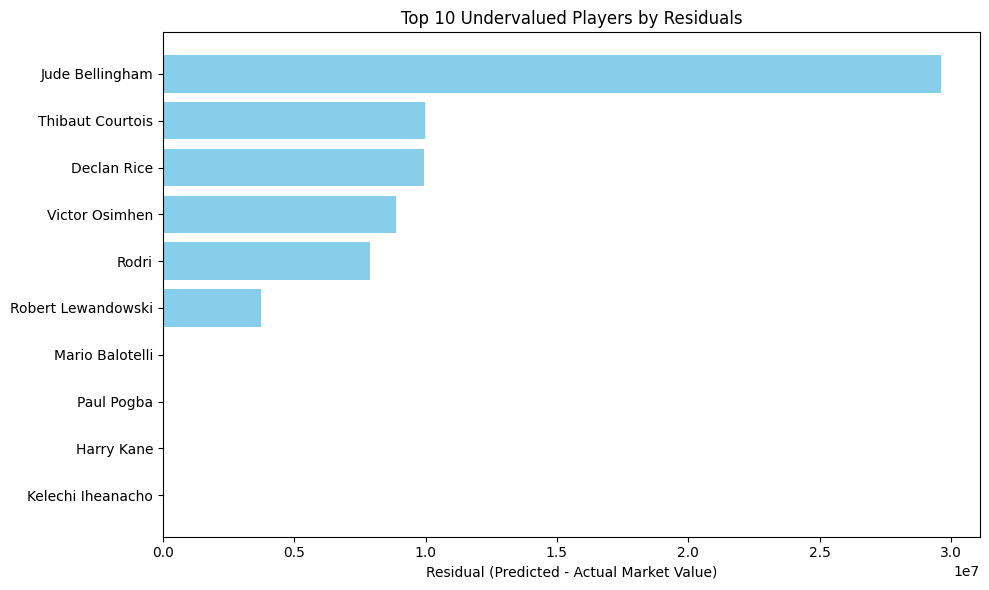

<Figure size 640x480 with 0 Axes>

In [205]:
#  Plot the residuals (undervaluation)
plt.figure(figsize=(10, 6))
plt.barh(top_10_undervalued['Name_y'], top_10_undervalued['residual'], color='skyblue')
plt.xlabel('Residual (Predicted - Actual Market Value)')
plt.title('Top 10 Undervalued Players by Residuals')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest residuals at the top
plt.tight_layout()
plt.show()

plt.savefig('/content/Results/Top_10_Undervalued_Players_by_Residuals.png')

Scatter and Box Plots of Actual vs Predicted Market Values:

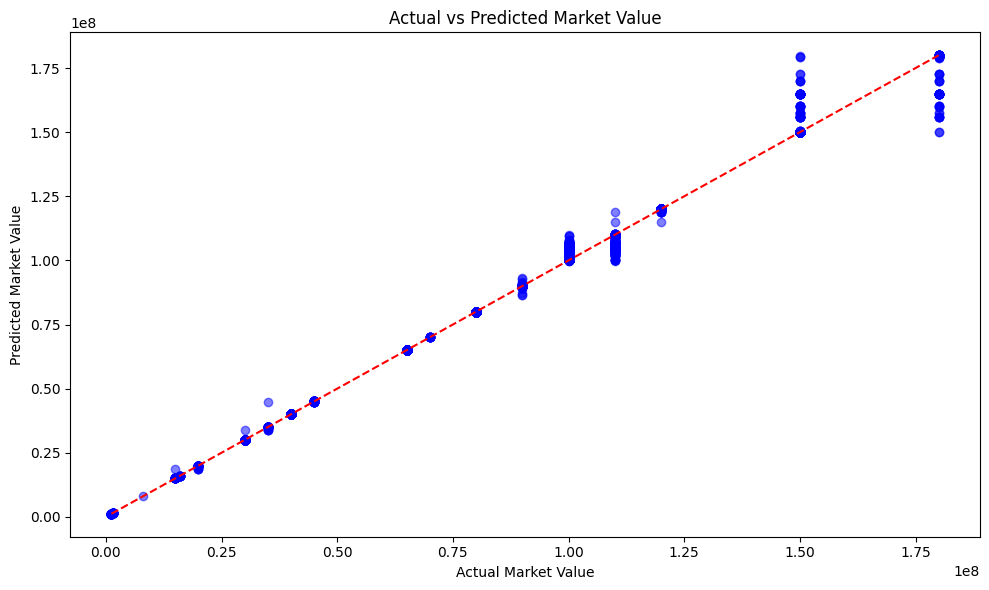

<Figure size 640x480 with 0 Axes>

In [206]:
#  scatter plot for Actual vs Predicted Market Values
plt.figure(figsize=(10, 6))
plt.scatter(df['mw'], df['predicted_market_value'], alpha=0.5, color='b')
plt.plot([df['mw'].min(), df['mw'].max()],
         [df['mw'].min(), df['mw'].max()], 'r--')  # Line showing ideal prediction

plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs Predicted Market Value')
plt.tight_layout()
plt.show()

plt.savefig('/content/Results/Actual_vs_Predicted_Market_Value.png')

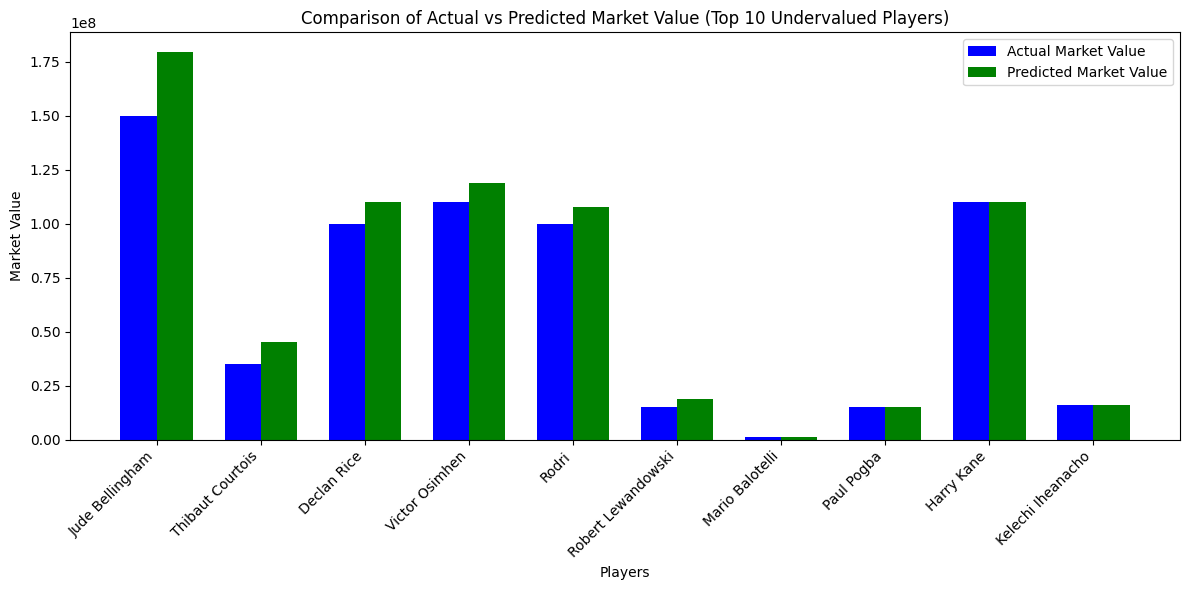

<Figure size 640x480 with 0 Axes>

In [207]:
#  bar plot to compare actual and predicted values for the top 10 players
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(top_10_undervalued))

# Actual Market Value bars
bar1 = ax.bar(index, top_10_undervalued['mw'], bar_width, label='Actual Market Value', color='blue')

# Predicted Market Value bars
bar2 = ax.bar(index + bar_width, top_10_undervalued['predicted_market_value'], bar_width, label='Predicted Market Value', color='green')

ax.set_xlabel('Players')
ax.set_ylabel('Market Value')
ax.set_title('Comparison of Actual vs Predicted Market Value (Top 10 Undervalued Players)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_10_undervalued['Name_y'], rotation=45, ha="right")
ax.legend()
plt.tight_layout()
plt.show()

plt.savefig('/content/Results/Comparison_of_Actual_vs_Predicted_Market_Value.png')

Player-level Analysis

In [208]:
#  Select the most undervalued player
most_undervalued_player = top_10_undervalued.iloc[0]

# Extract player-specific information
player_name = most_undervalued_player['Name_y']
player_market_value = most_undervalued_player['mw']
player_predicted_value = most_undervalued_player['predicted_market_value']
player_age = df[df['Name_y'] == player_name]['Age_y'].values[0]
player_sentiment = df[df['Name_y'] == player_name]['score'].values[0]
player_nationality = df[df['Name_y'] == player_name]['Nationality'].values[0]

# Display player analysis
print(f"Player: {player_name}")
print(f"Actual Market Value: {player_market_value}")
print(f"Predicted Market Value: {player_predicted_value}")
print(f"Age: {player_age}")
print(f"Sentiment Score: {player_sentiment}")
print(f"Nationality: {player_nationality}")

Player: Jude Bellingham
Actual Market Value: 150000000.0
Predicted Market Value: 179622288.0
Age: 18
Sentiment Score: 0.49782270193099976
Nationality: England


##Feature Importance

In [217]:
num_feature_names = ['Age_y', 'futureTransfer', 'contract_years_remaining', 'lagged_score']

# Assume these are the categorical features that were one-hot encoded. Adjust as needed.
ohe_feature_names = ['upcoming', 'Team','Position', 'Club', 'Nationality']


# Combine numerical and categorical feature names
feature_names = np.concatenate([num_feature_names, ohe_feature_names])

In [218]:
best_model = best_pipeline.named_steps['model']
preprocessor = best_pipeline.named_steps['preprocessor']


In [219]:
# Get feature importances from the best model
importances = best_model.feature_importances_


In [222]:
# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['upcoming', 'Team','Position', 'Club', 'Nationality'])
num_feature_names = ['Age_y', 'futureTransfer', 'contract_years_remaining', 'lagged_score']

# Combine numerical and categorical feature names
feature_names = np.concatenate([num_feature_names, ohe_feature_names])

# Check the length of feature_names and importances
print(f"Length of feature_names: {len(feature_names)}")
print(f"Length of importances: {len(importances)}")



Length of feature_names: 51
Length of importances: 51


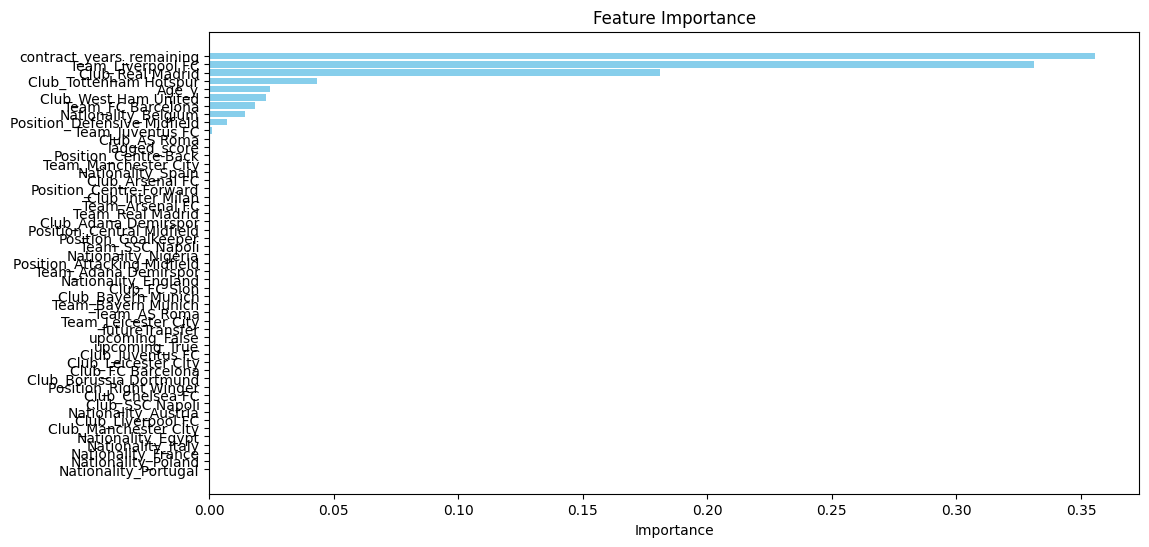

                        Feature    Importance
2      contract_years_remaining  3.556046e-01
13            Team_Liverpool FC  3.310386e-01
37             Club_Real Madrid  1.808488e-01
39       Club_Tottenham Hotspur  4.309890e-02
0                         Age_y  2.434724e-02
40         Club_West Ham United  2.273644e-02
10            Team_FC Barcelona  1.844574e-02
42          Nationality_Belgium  1.450034e-02
21  Position_Defensive Midfield  7.184634e-03
11             Team_Juventus FC  9.960203e-04
24                 Club_AS Roma  4.333166e-04
3                  lagged_score  2.866506e-04
19         Position_Centre-Back  1.925280e-04
14         Team_Manchester City  9.131226e-05
50            Nationality_Spain  5.397452e-05
26              Club_Arsenal FC  3.163919e-05
20      Position_Centre-Forward  2.850801e-05
32             Club_Inter Milan  1.373611e-05
8               Team_Arsenal FC  1.219557e-05
15             Team_Real Madrid  1.089731e-05
25         Club_Adana Demirspor  7

<Figure size 640x480 with 0 Axes>

In [224]:
# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()
print(feature_importance_df)

plt.savefig('/content/Results/Feature_Importance.png')